# 📊 Pipeline de Clustering Basado en Densidad (Diabetes)
Equivalente a `scripts/main.py`. Ejecuta:
- Carga y escalado del dataset de **diabetes** (Kaggle).
- **PCA (2D)** y visualización.
- **DBSCAN** (varios `eps`/`min_samples`) + métricas (Silueta, Davies–Bouldin).
- **UMAP** (2D) si está disponible.
- **HDBSCAN** con distintos `min_cluster_size`.
- **Detección de anomalías** con Isolation Forest y One-Class SVM.

## 🔧 Requisitos
Asegúrate de tener el entorno activo e instalar dependencias opcionales:
```bash
conda activate especialidadmachinelearning
pip install umap-learn hdbscan kagglehub
```
Si quieres forzar una ruta local del CSV de Kaggle:
```bash
export DIABETES_CSV="data/diabetes.csv"
```

In [1]:
!pip install scikit-learn matplotlib seaborn pandas hdbscan kagglehub umap-learn
%matplotlib inline

In [2]:
import os, numpy as np, pandas as pd
from sklearn.decomposition import PCA

# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print("project_root:", project_root)
from src.utils import cargar_dataset
from src.utils import cargar_dataset
from src.modelos import (
    aplicar_dbscan,
    aplicar_hdbscan,
    aplicar_umap,
    detectar_anomalias_isolation_forest,
    detectar_anomalias_one_class_svm
)
from src.visualizador import visualizar_clusters
from src.evaluador import evaluar_clusterings
output_dir = "outputs"; os.makedirs(output_dir, exist_ok=True)

project_root: /home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo6EvalModularMarcoParra


/home/mparraf/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔹 Iniciando pipeline Clustering Basado en Densidad...
📥 Cargando dataset 'diabetes'...
🔍 Verificando NaN iniciales: 0
✅ Verificación final: 0 NaNs restantes
⚠️ Filas eliminadas por outliers: 129
✅ Dataset cargado completo: 639 filas, 8 features
🔍 Varianza explicada por PCA: 0.58


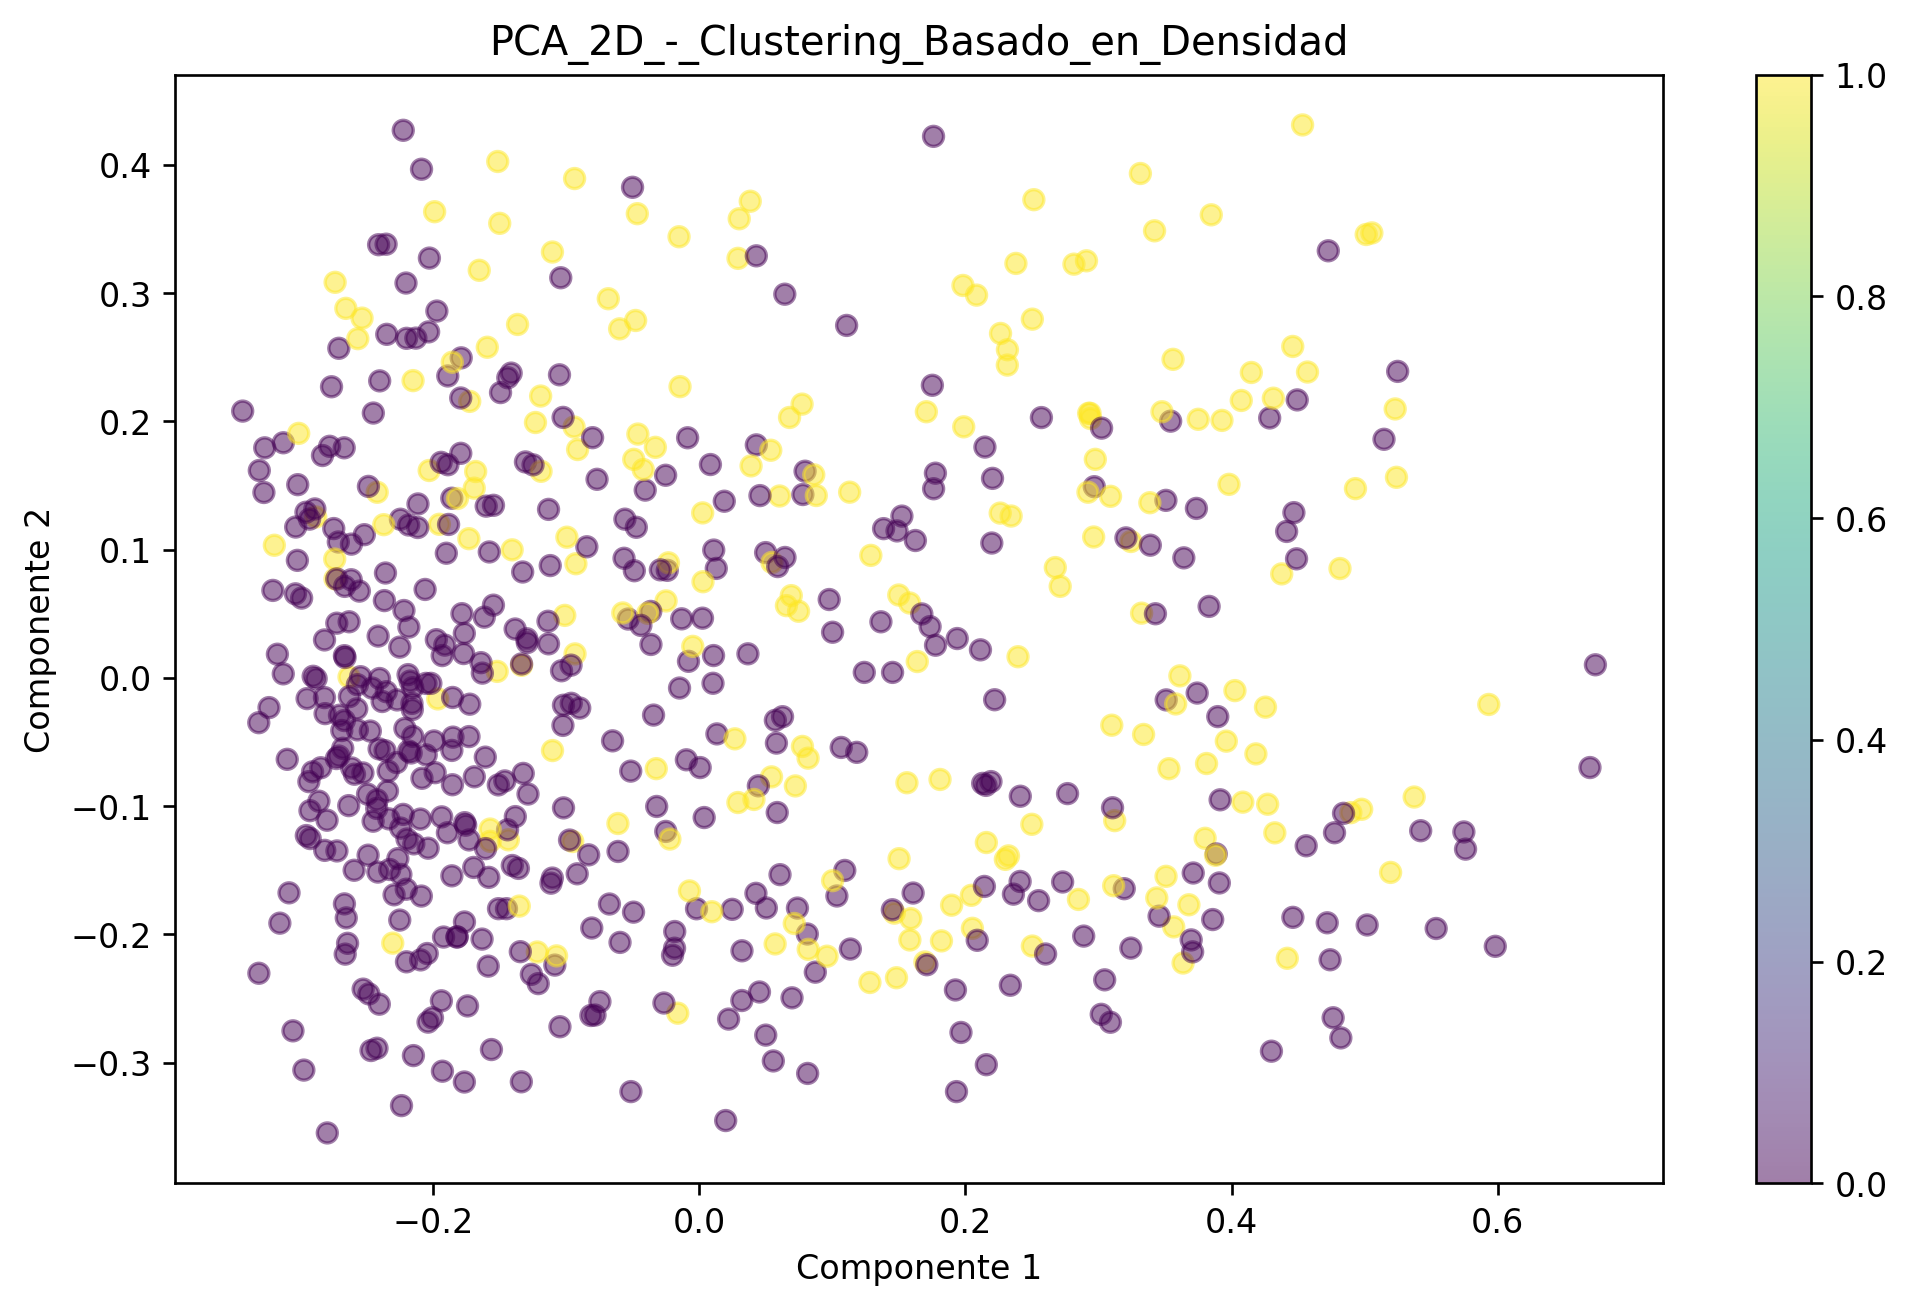

📊 Visualización guardada en outputs/viz_PCA_2D_-_Clustering_Basado_en_Densidad.png


In [3]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt

# opcional: mejor nitidez/tamaño
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (8, 6)

print("🔹 Iniciando pipeline Clustering Basado en Densidad...")
# Carga (devuelve ya escalado)
X_scaled, y = cargar_dataset("diabetes", usar_minmax=True)
X = X_scaled  # mantener referencia
# PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"🔍 Varianza explicada por PCA: {pca.explained_variance_ratio_.sum():.2f}")
# Visual base
visualizar_clusters(X_pca, y, "PCA_2D_-_Clustering_Basado_en_Densidad")

📌 Evaluando DBSCAN eps=0.3, min_samples=3


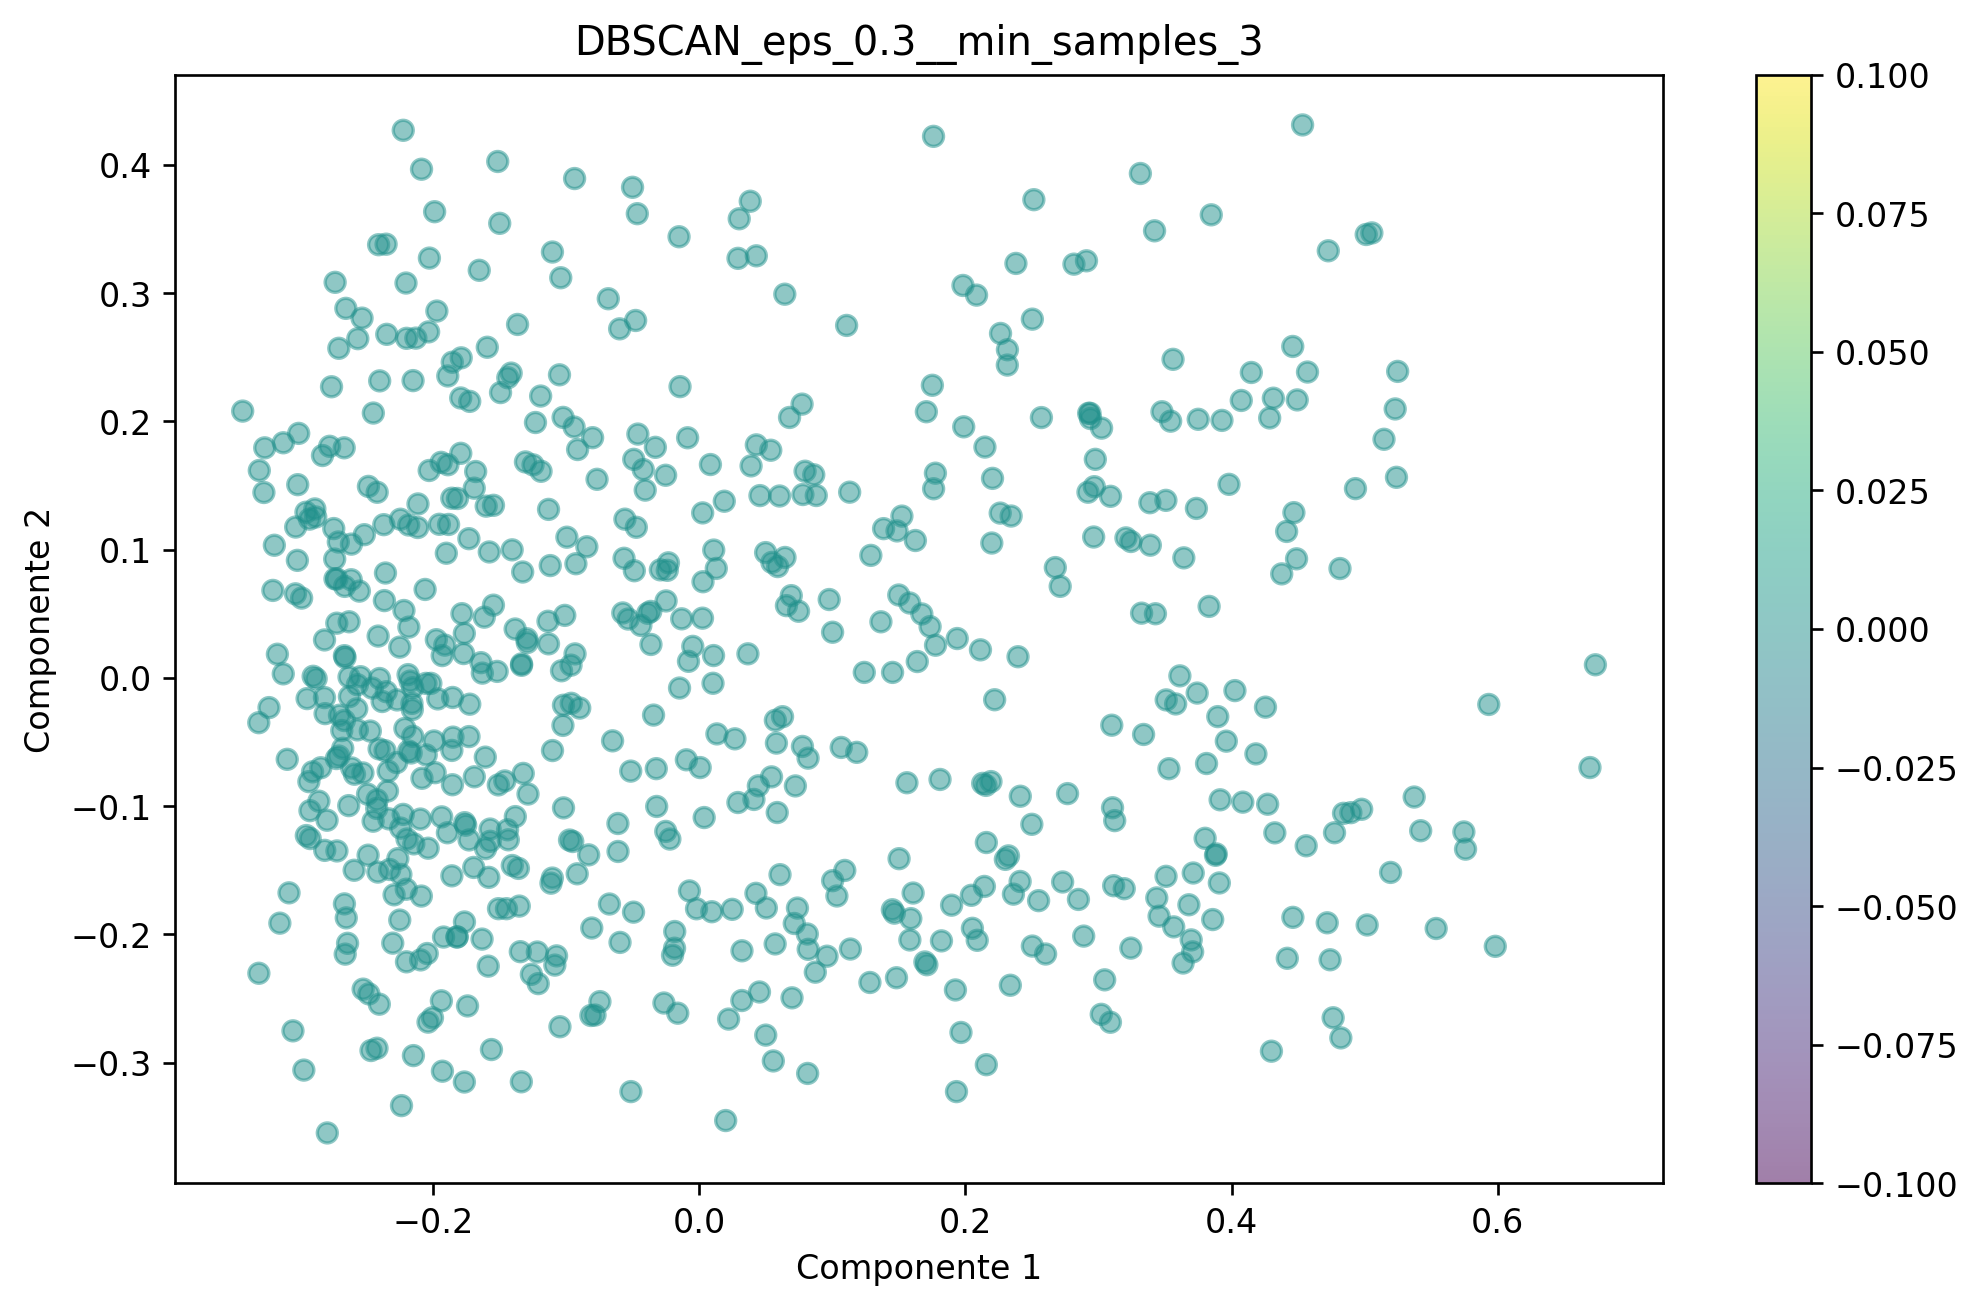

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.3__min_samples_3.png
📌 Evaluando DBSCAN eps=0.3, min_samples=5


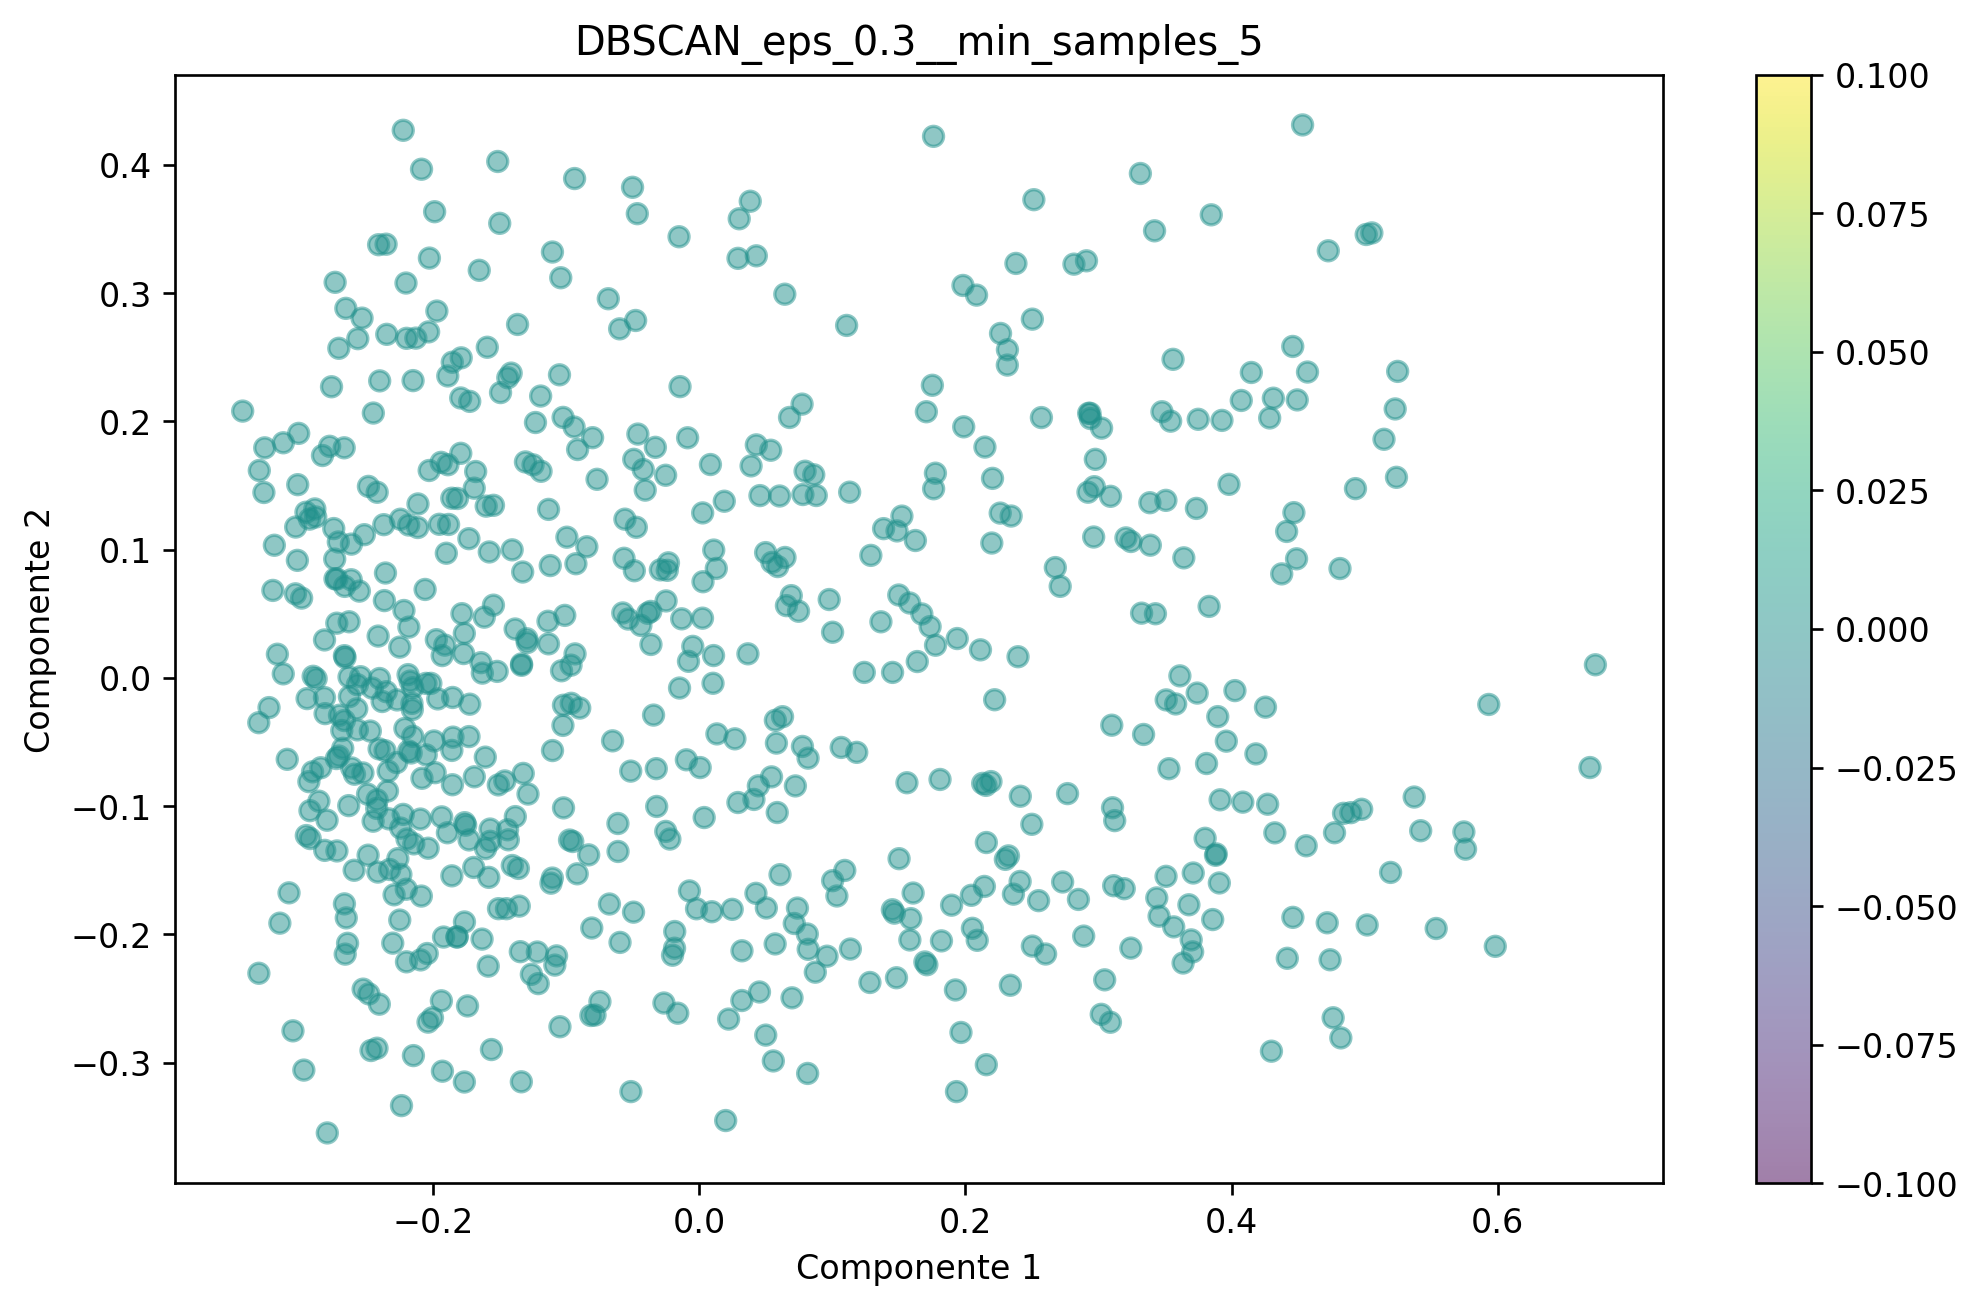

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.3__min_samples_5.png
📌 Evaluando DBSCAN eps=0.3, min_samples=10


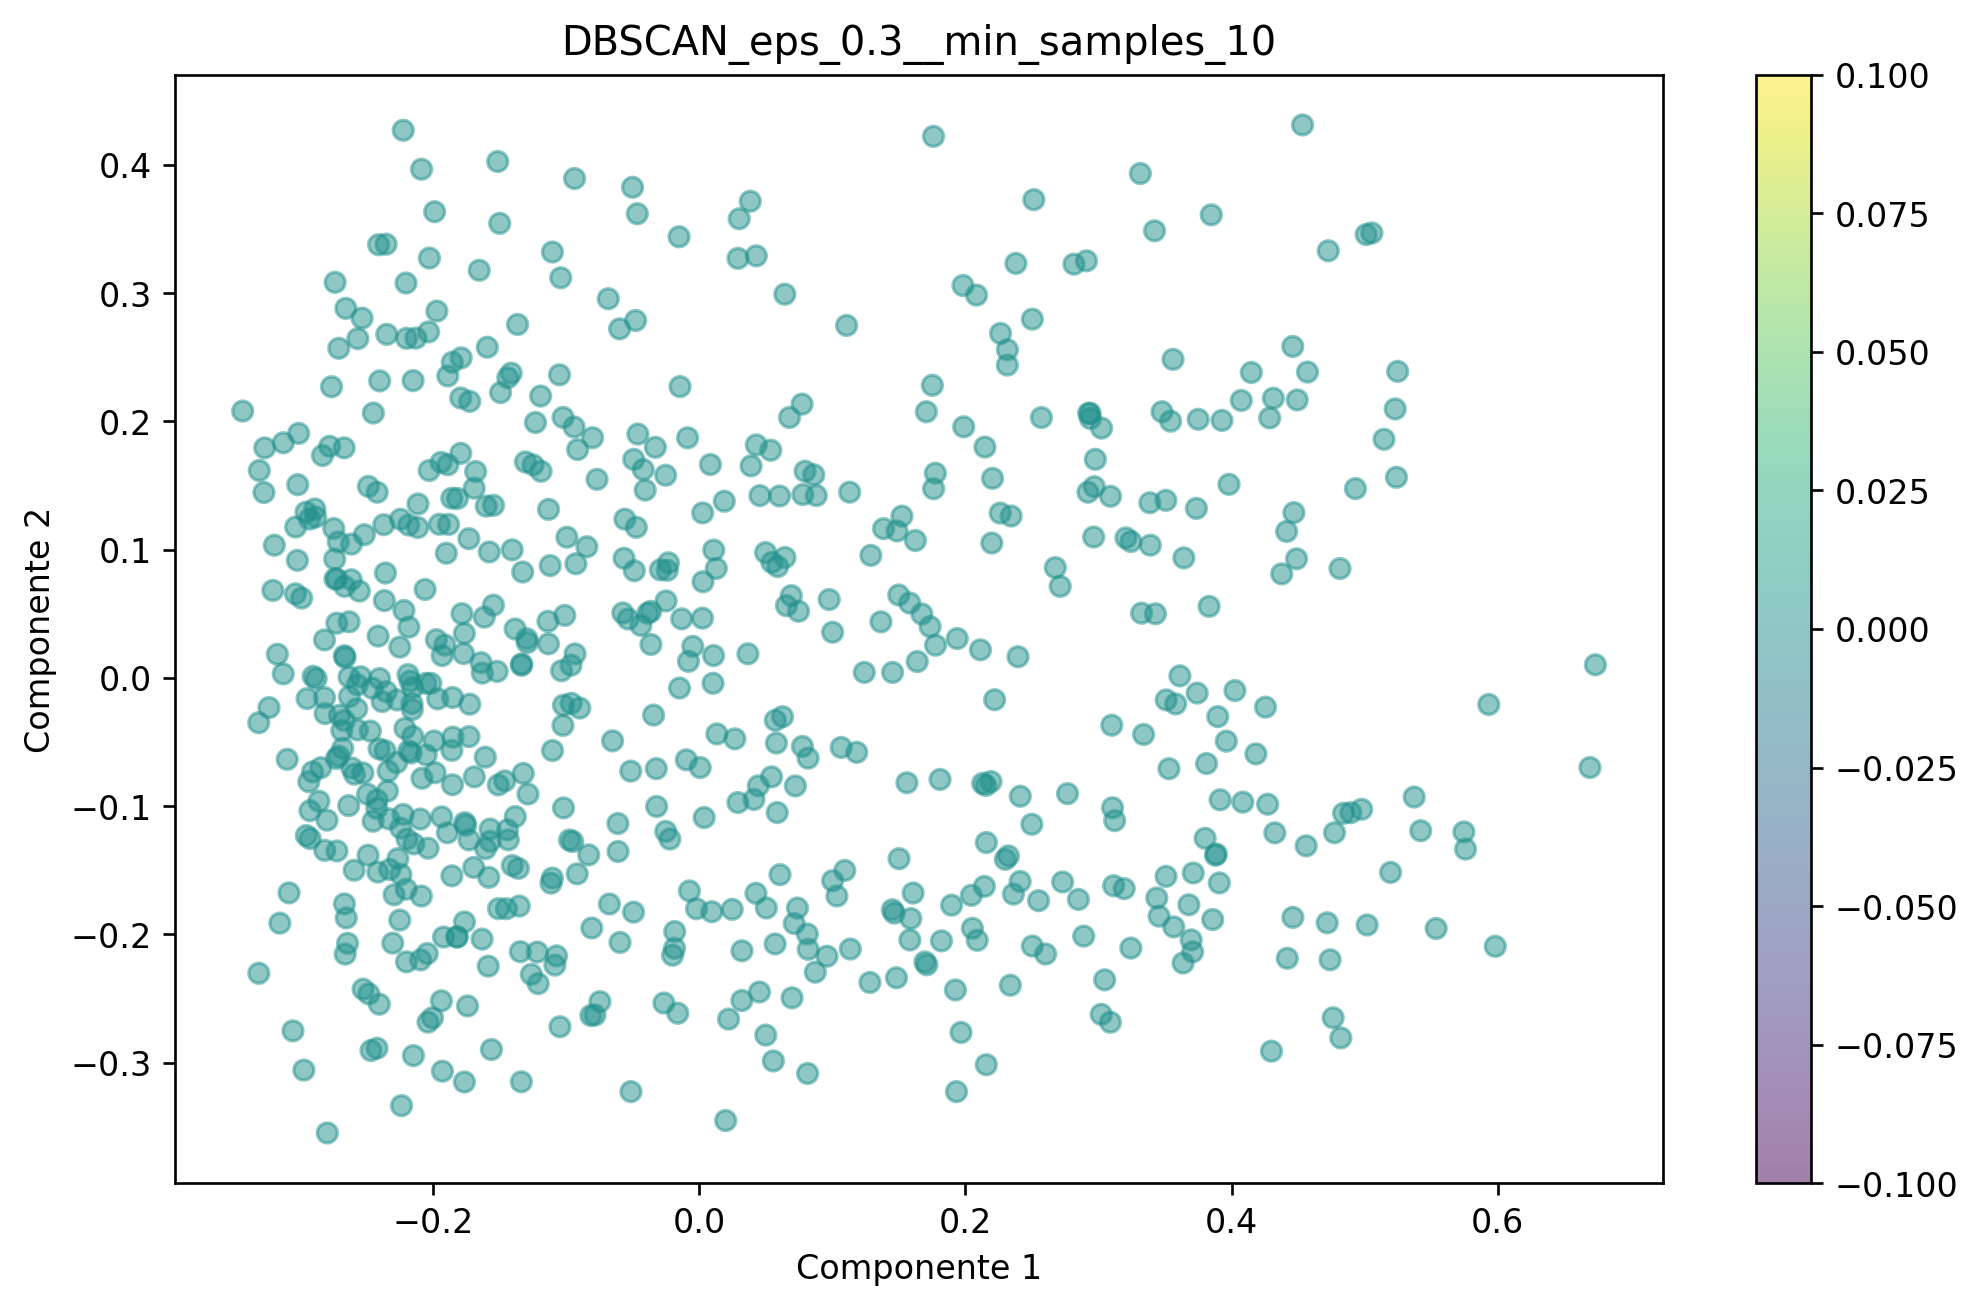

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.3__min_samples_10.png
📌 Evaluando DBSCAN eps=0.5, min_samples=3


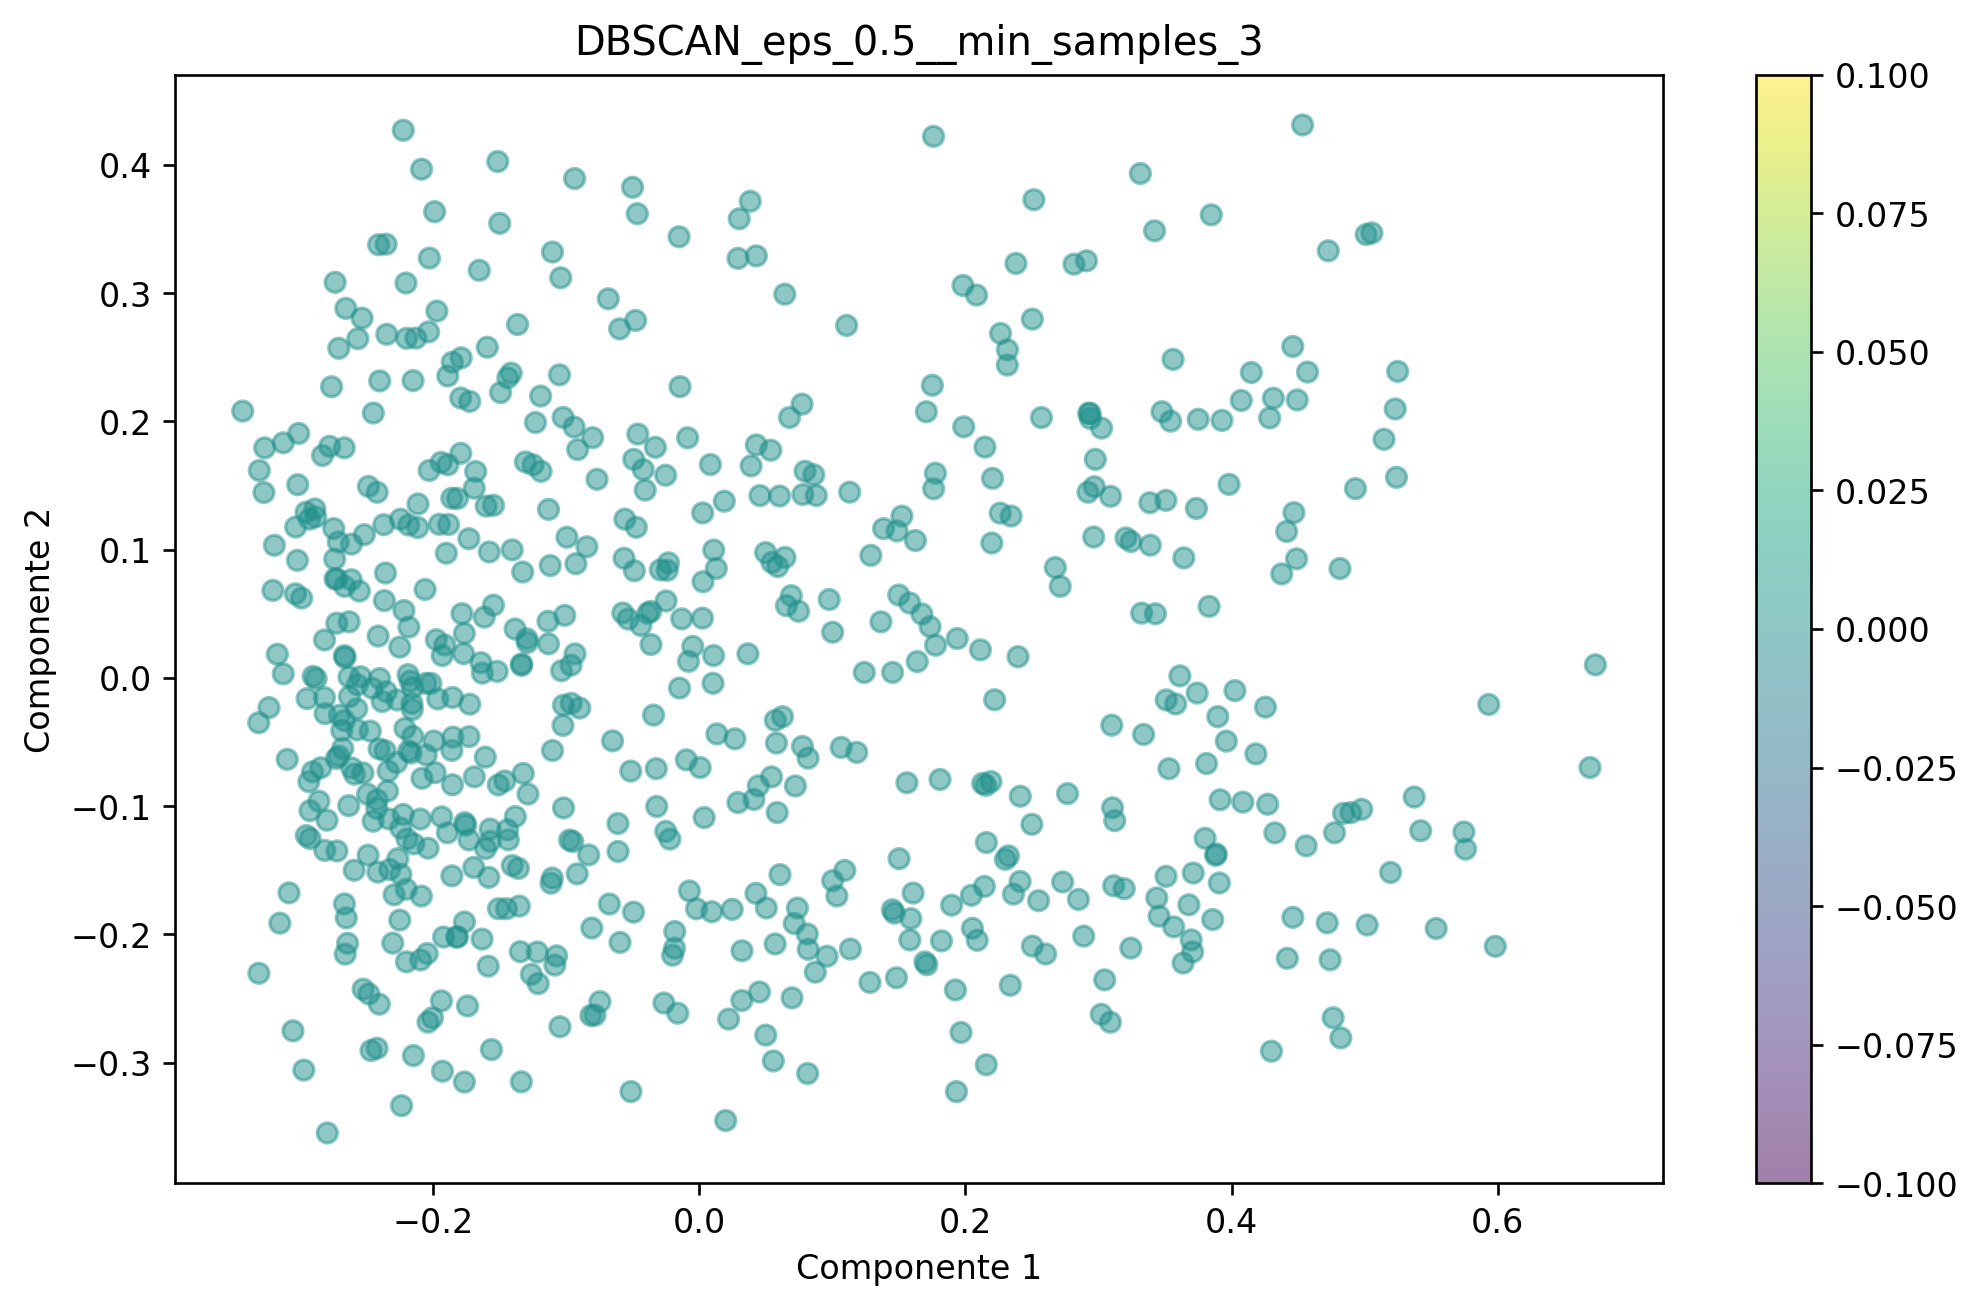

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.5__min_samples_3.png
📌 Evaluando DBSCAN eps=0.5, min_samples=5


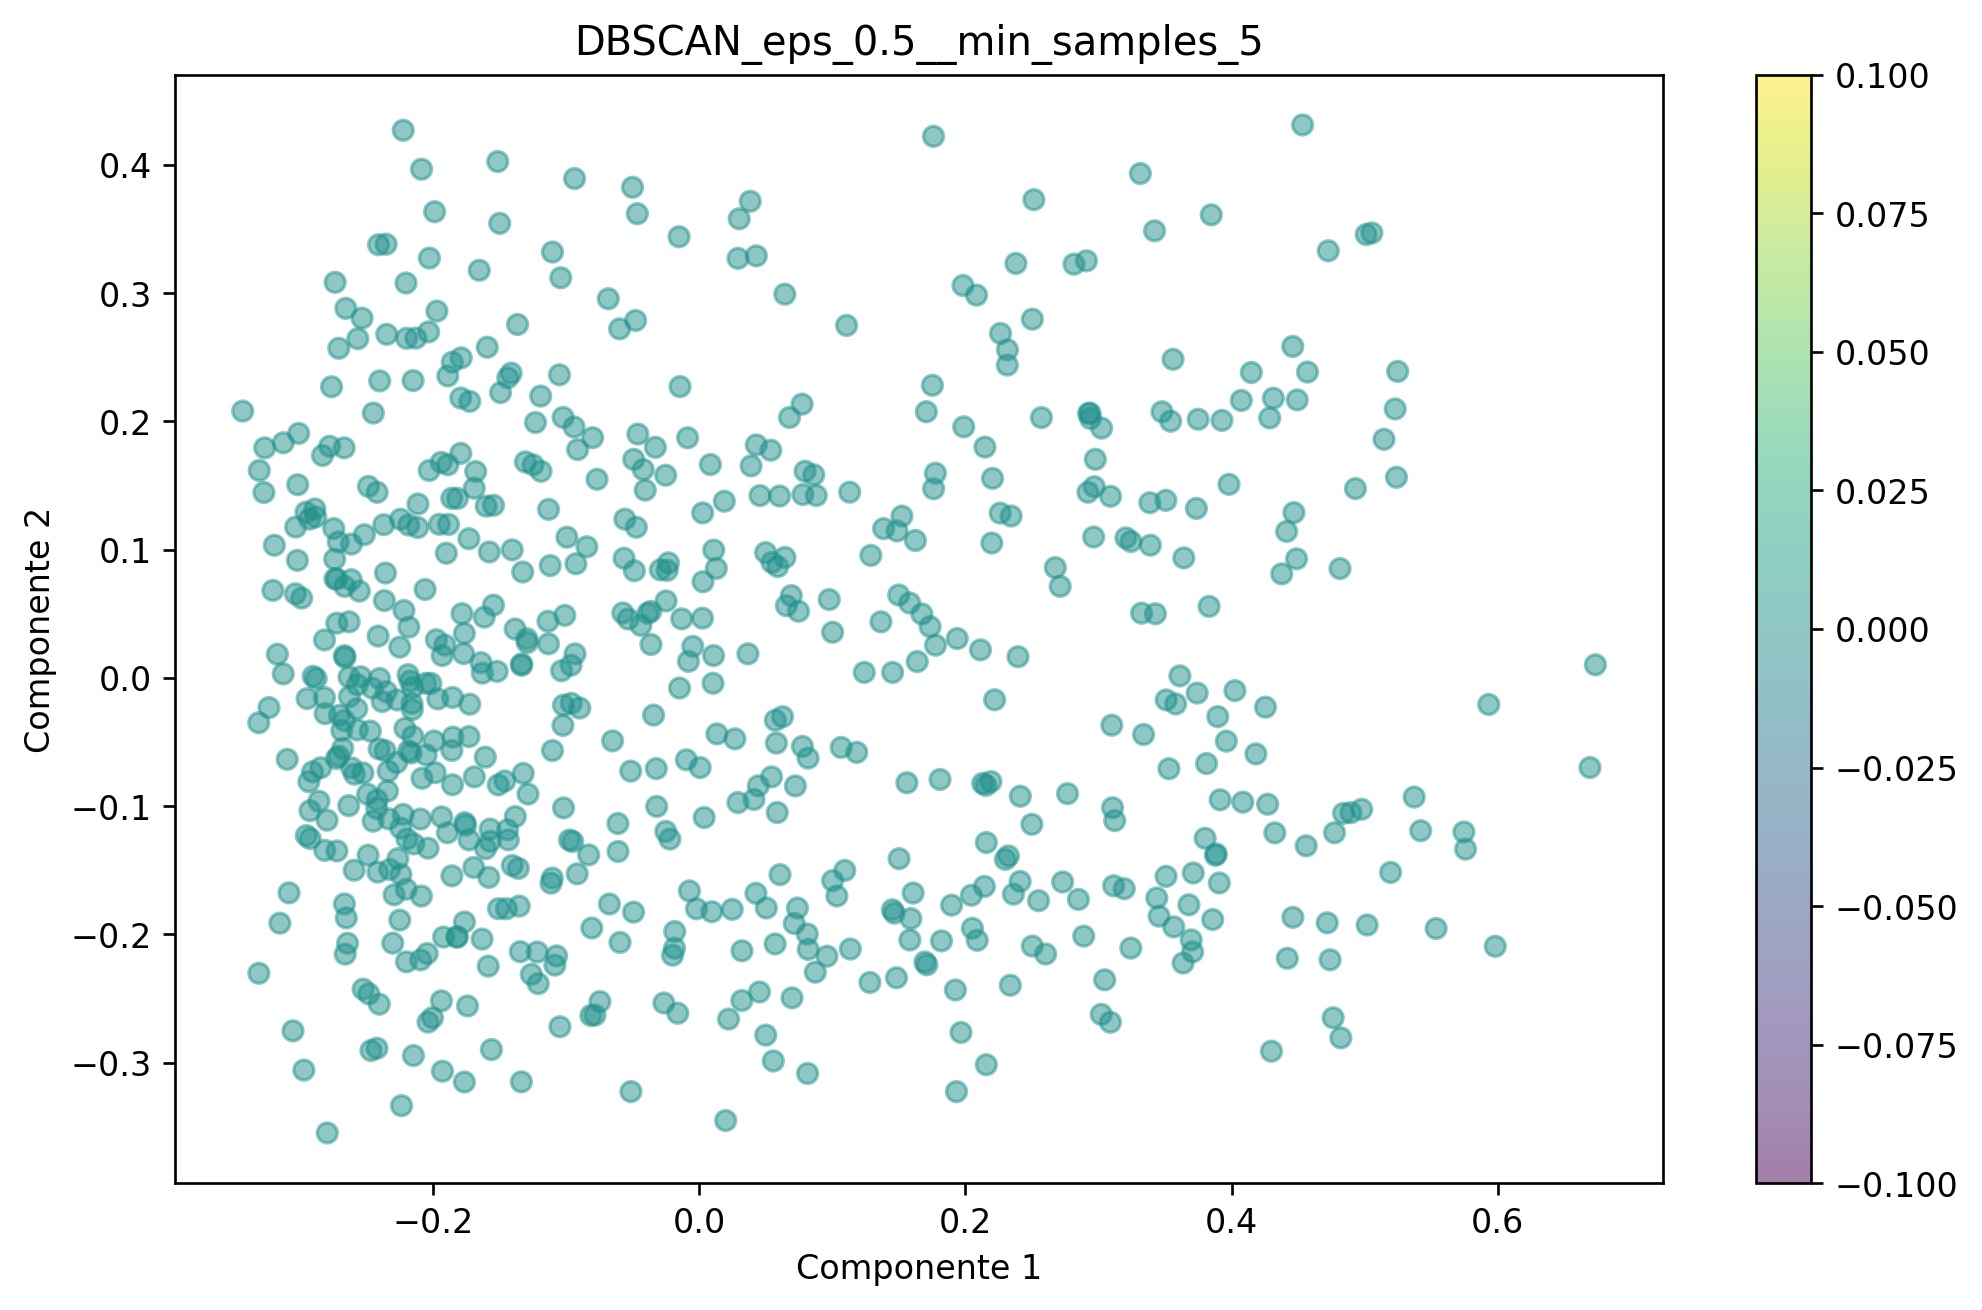

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.5__min_samples_5.png
📌 Evaluando DBSCAN eps=0.5, min_samples=10


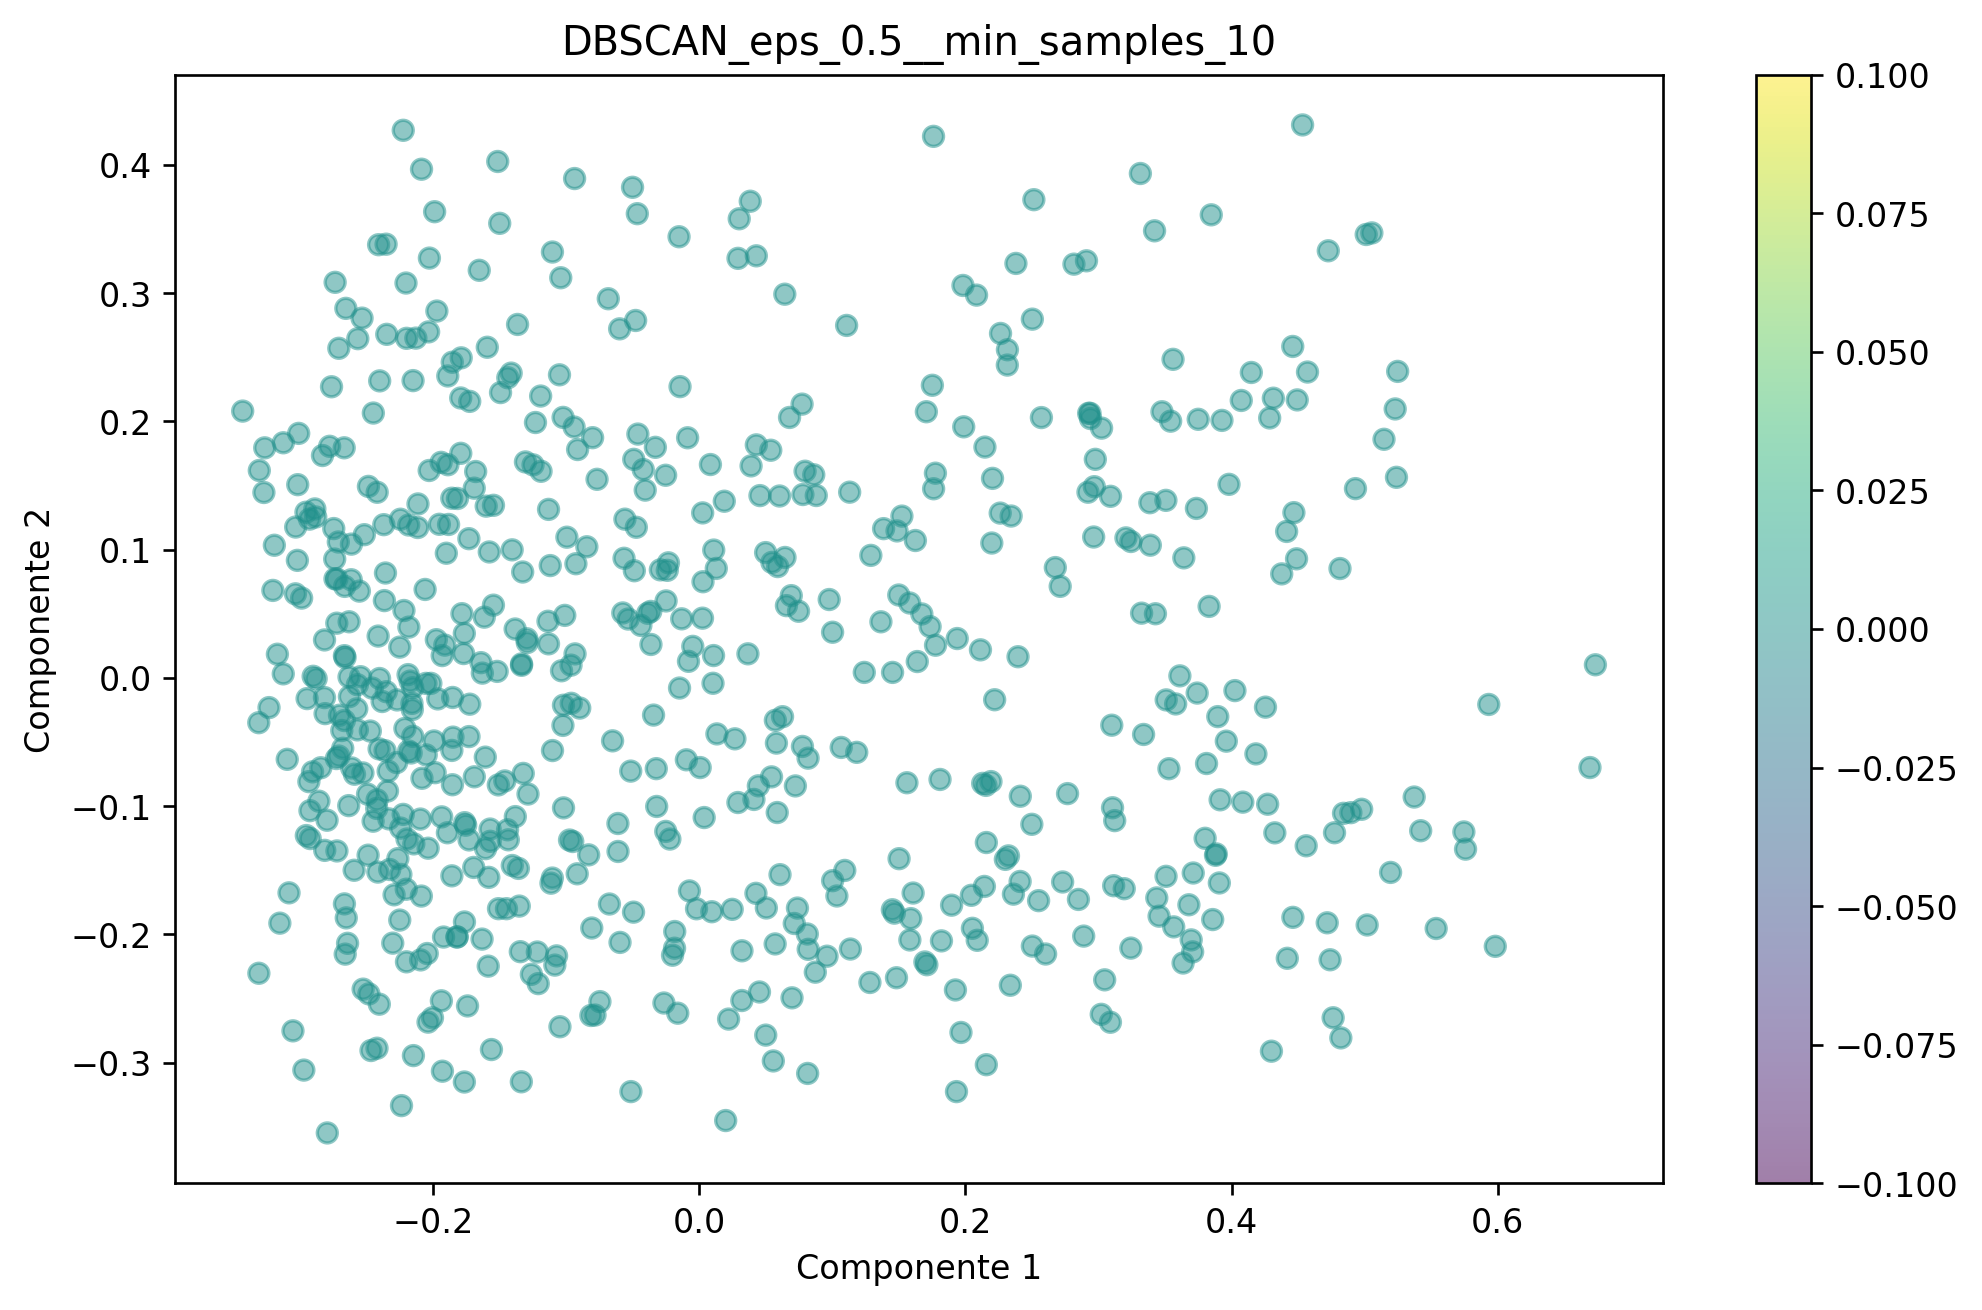

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.5__min_samples_10.png
📌 Evaluando DBSCAN eps=0.7, min_samples=3


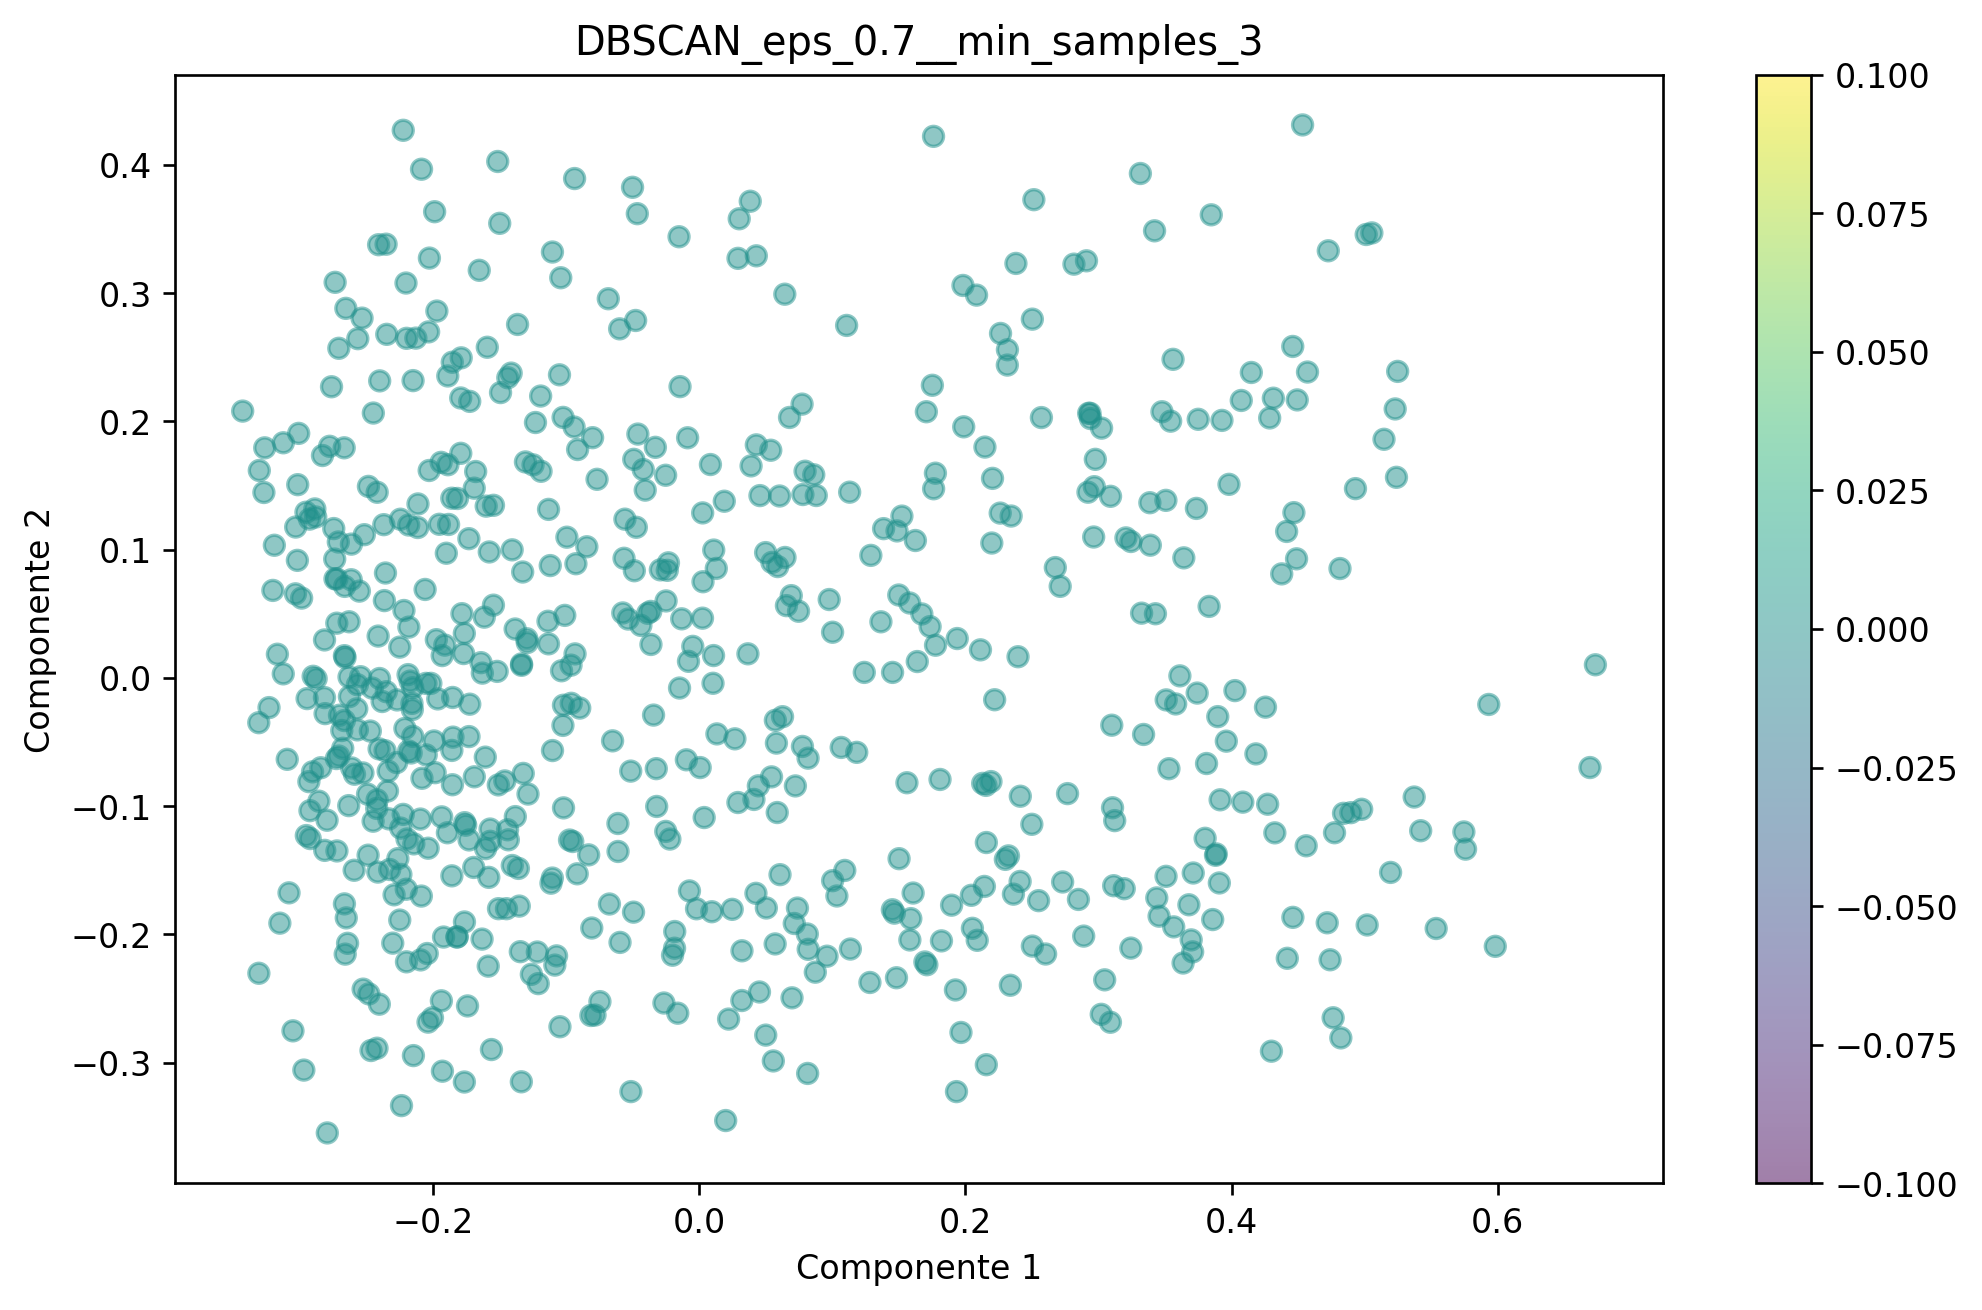

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.7__min_samples_3.png
📌 Evaluando DBSCAN eps=0.7, min_samples=5


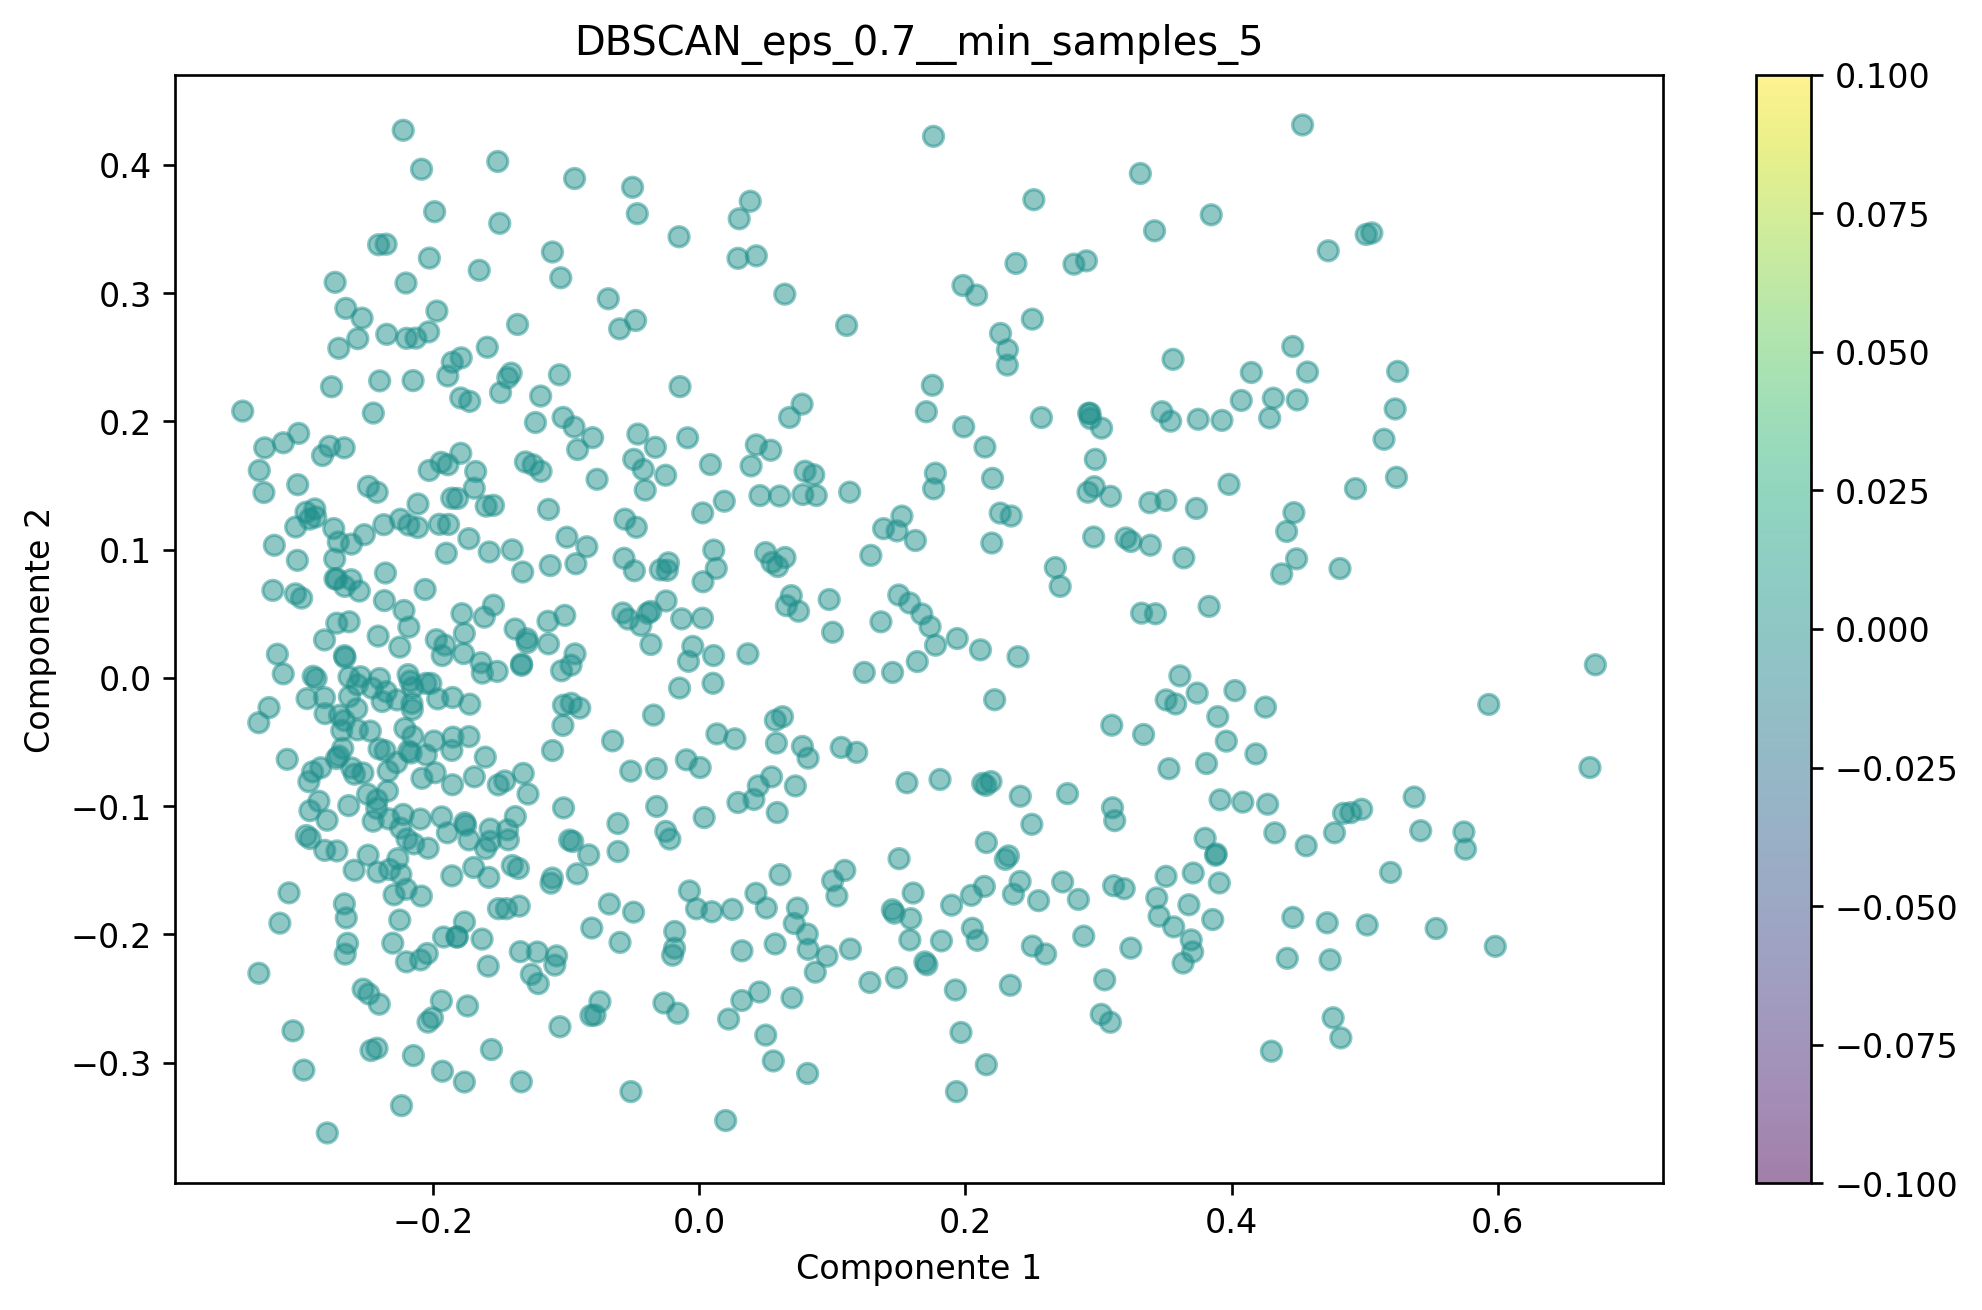

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.7__min_samples_5.png
📌 Evaluando DBSCAN eps=0.7, min_samples=10


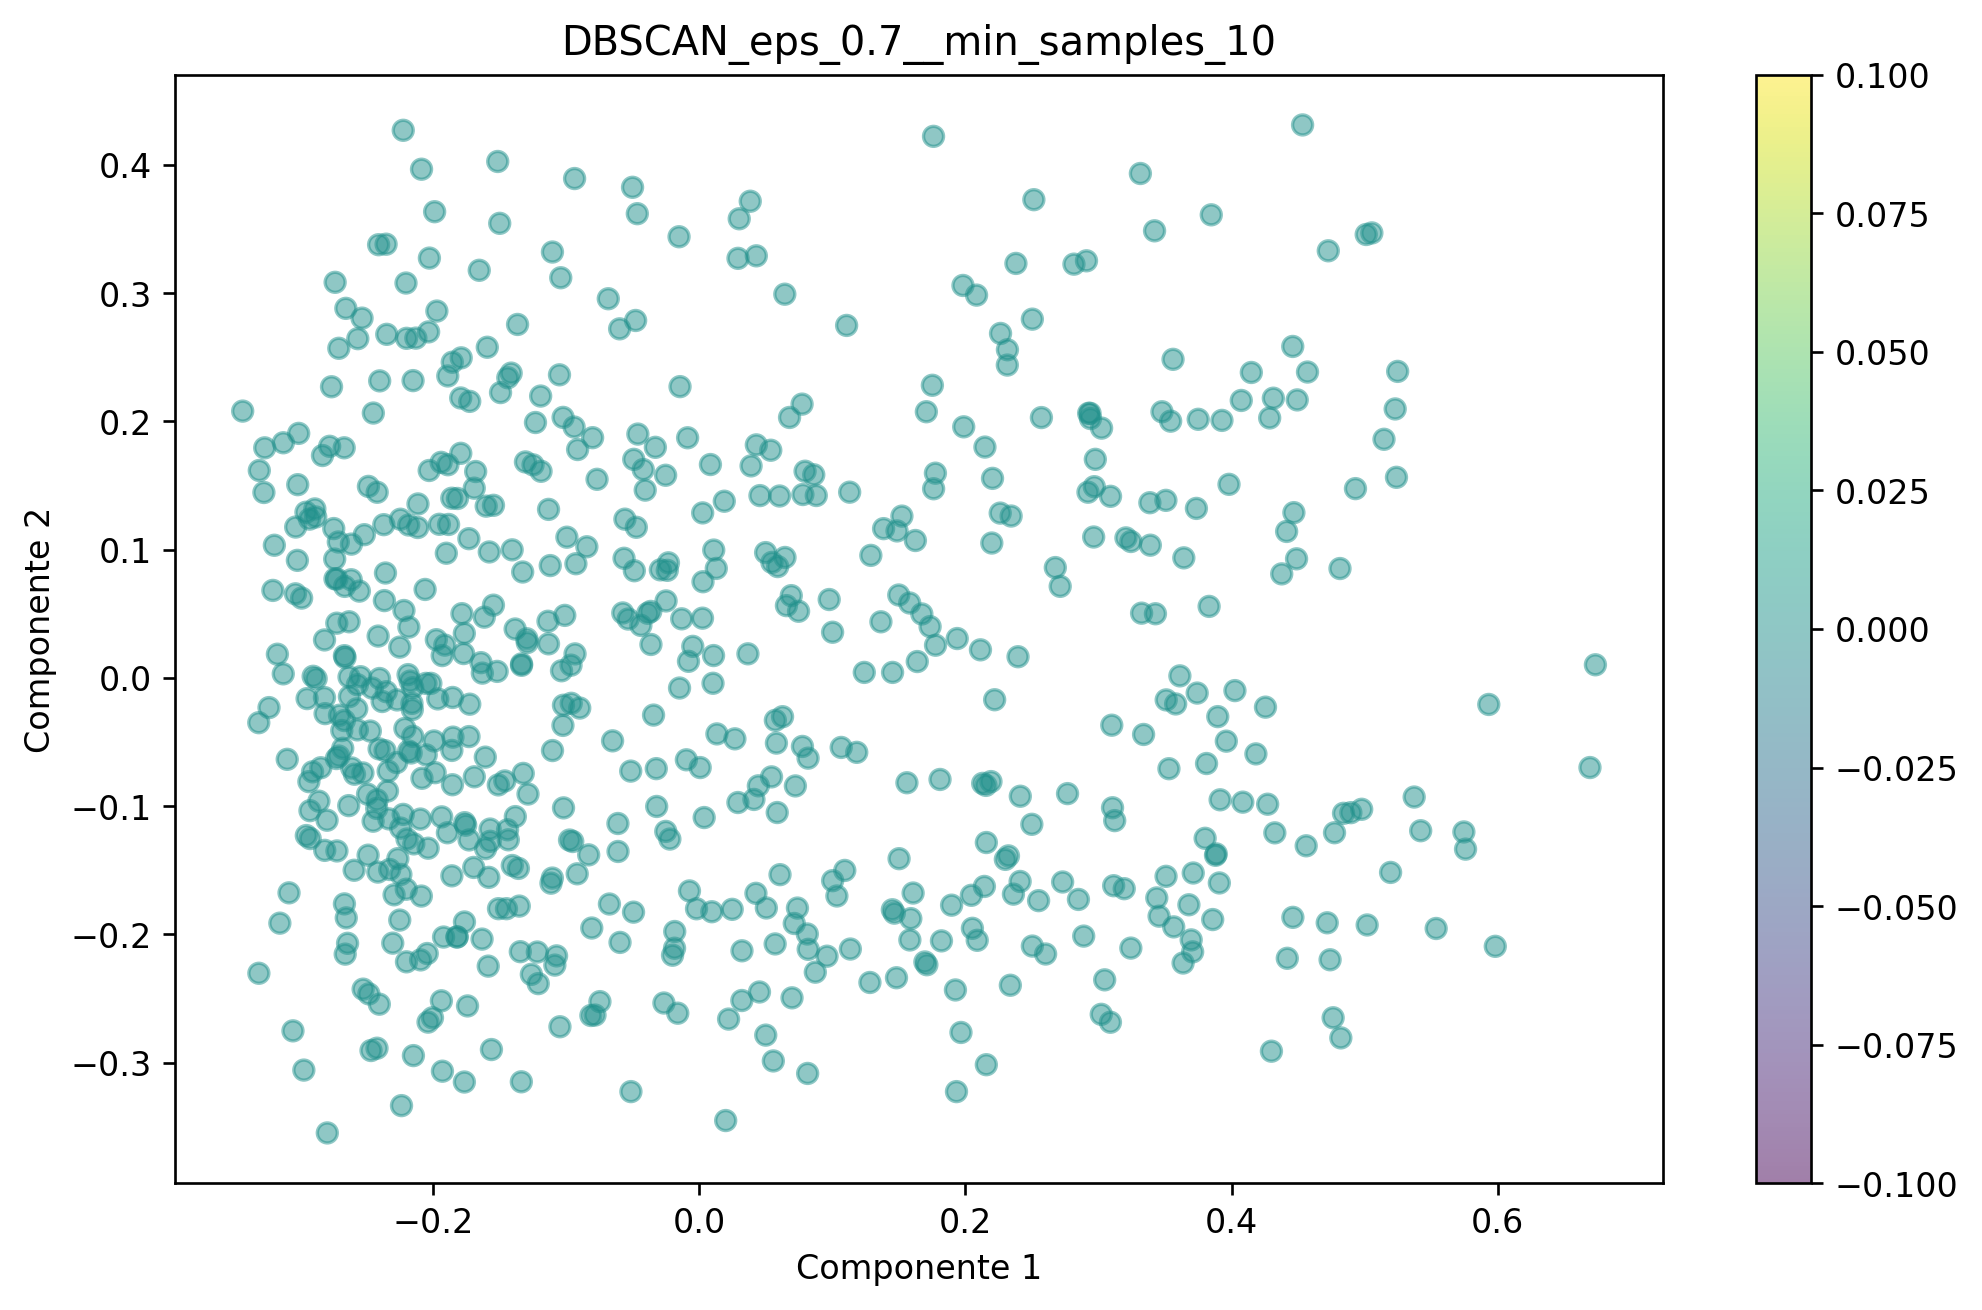

📊 Visualización guardada en outputs/viz_DBSCAN_eps_0.7__min_samples_10.png
✅ Resultados DBSCAN guardados en CSV consolidado


In [4]:
# === DBSCAN (rejilla pequeña) ===
resultados_dbscan = []
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 10]:
        print(f"📌 Evaluando DBSCAN eps={eps}, min_samples={min_samples}")
        etiquetas = aplicar_dbscan(X_pca, eps=eps, min_samples=min_samples)
        visualizar_clusters(X_pca, etiquetas, f"DBSCAN_eps_{eps}__min_samples_{min_samples}")
        resultados_dbscan.append(
            evaluar_clusterings(X_pca, etiquetas, "DBSCAN", {"eps": eps, "min_samples": min_samples})
        )
pd.DataFrame(resultados_dbscan).to_csv(f"{output_dir}/DBSCAN_consolidado.csv", index=False)
print("✅ Resultados DBSCAN guardados en CSV consolidado")

/home/mparraf/.conda/envs/especialidadmachinelearning/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


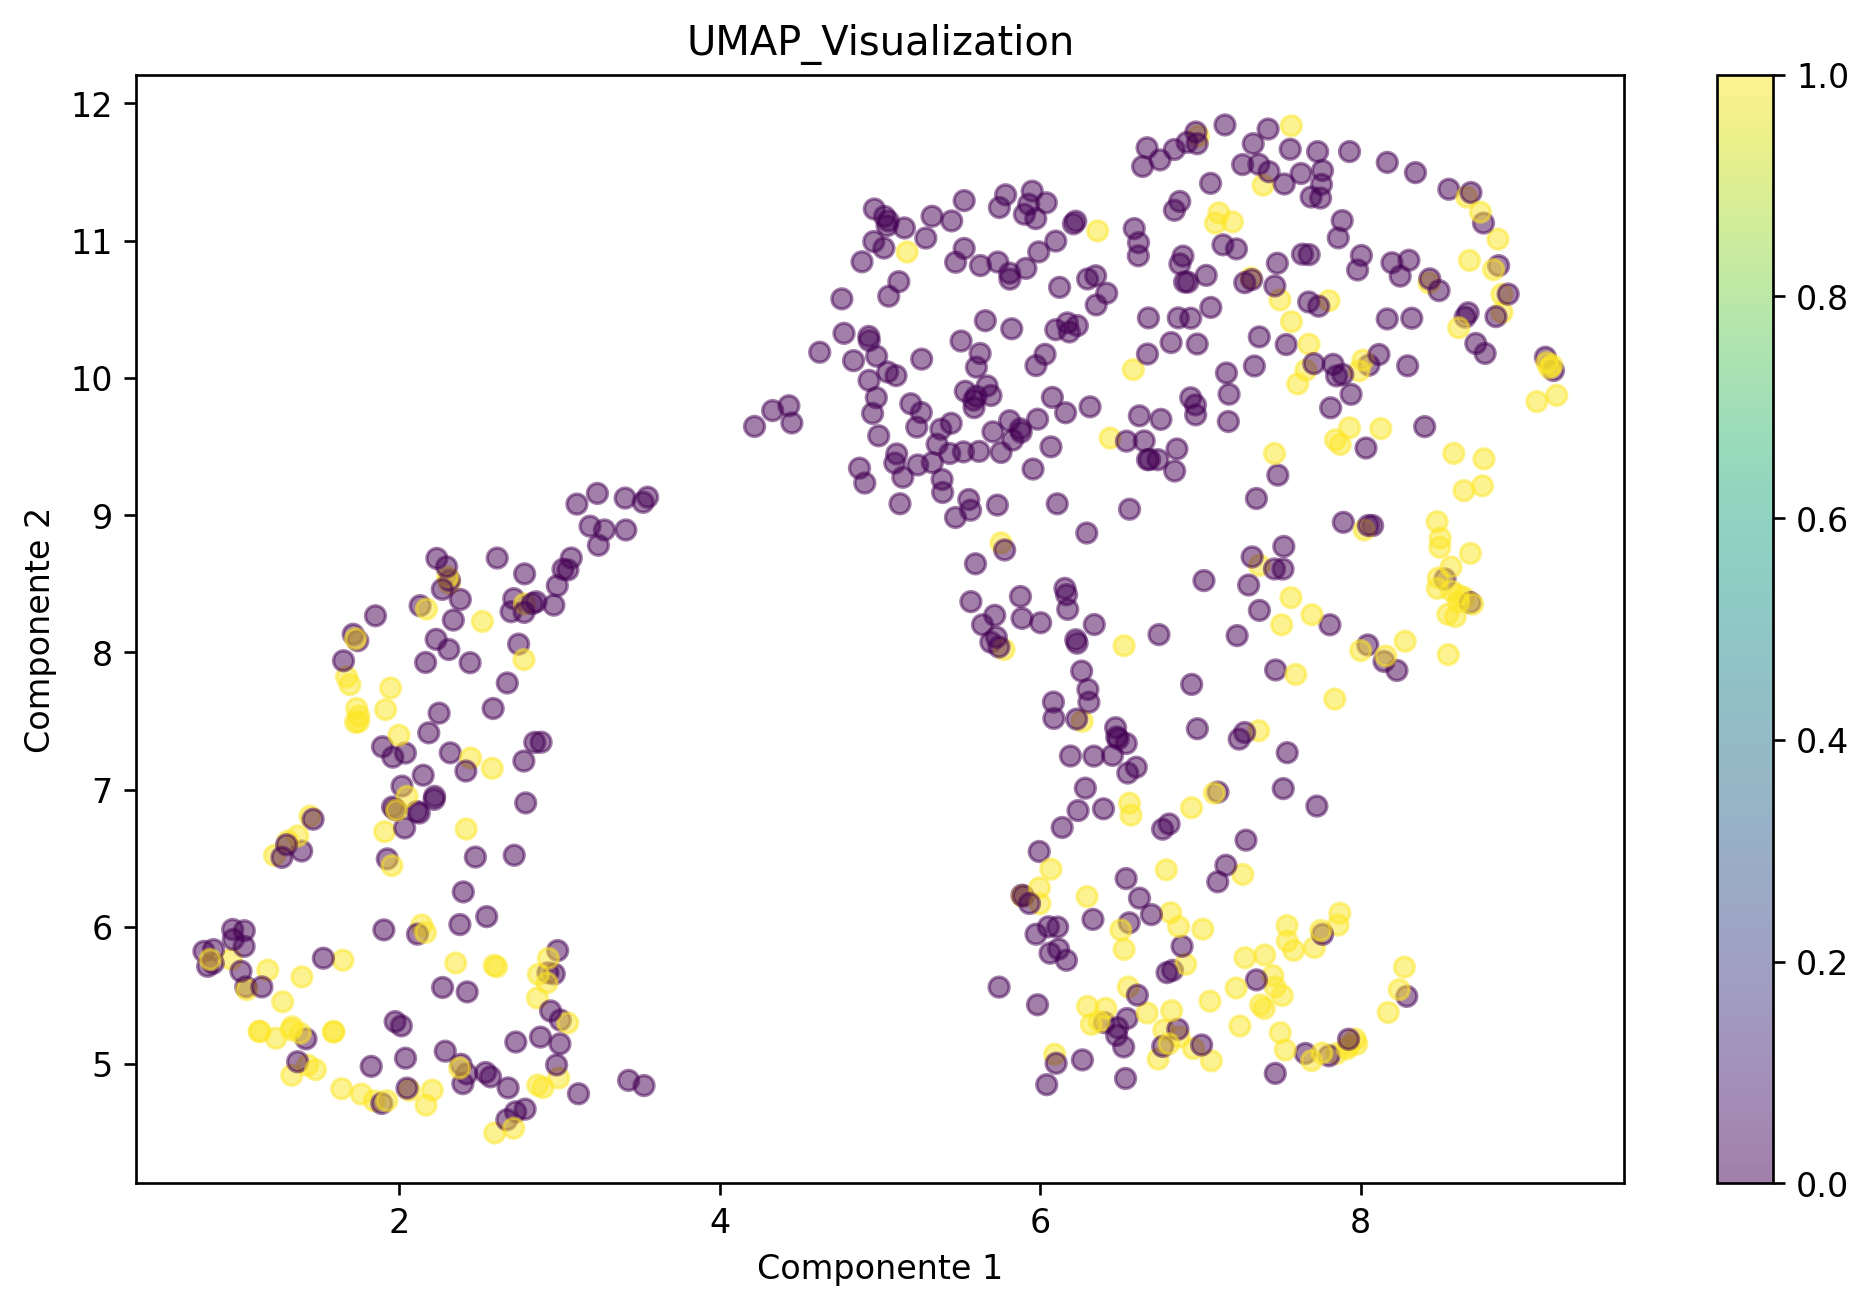

📊 Visualización guardada en outputs/viz_UMAP_Visualization.png


In [5]:
# === UMAP (opcional) ===
try:
    X_umap = aplicar_umap(X_scaled, n_components=2)
    visualizar_clusters(X_umap, y, "UMAP_Visualization")
except Exception as e:
    print("UMAP no disponible o falló:", e)

📌 Evaluando HDBSCAN con min_cluster_size=5
🔧 Ejecutando HDBSCAN (min_cluster_size=5)...


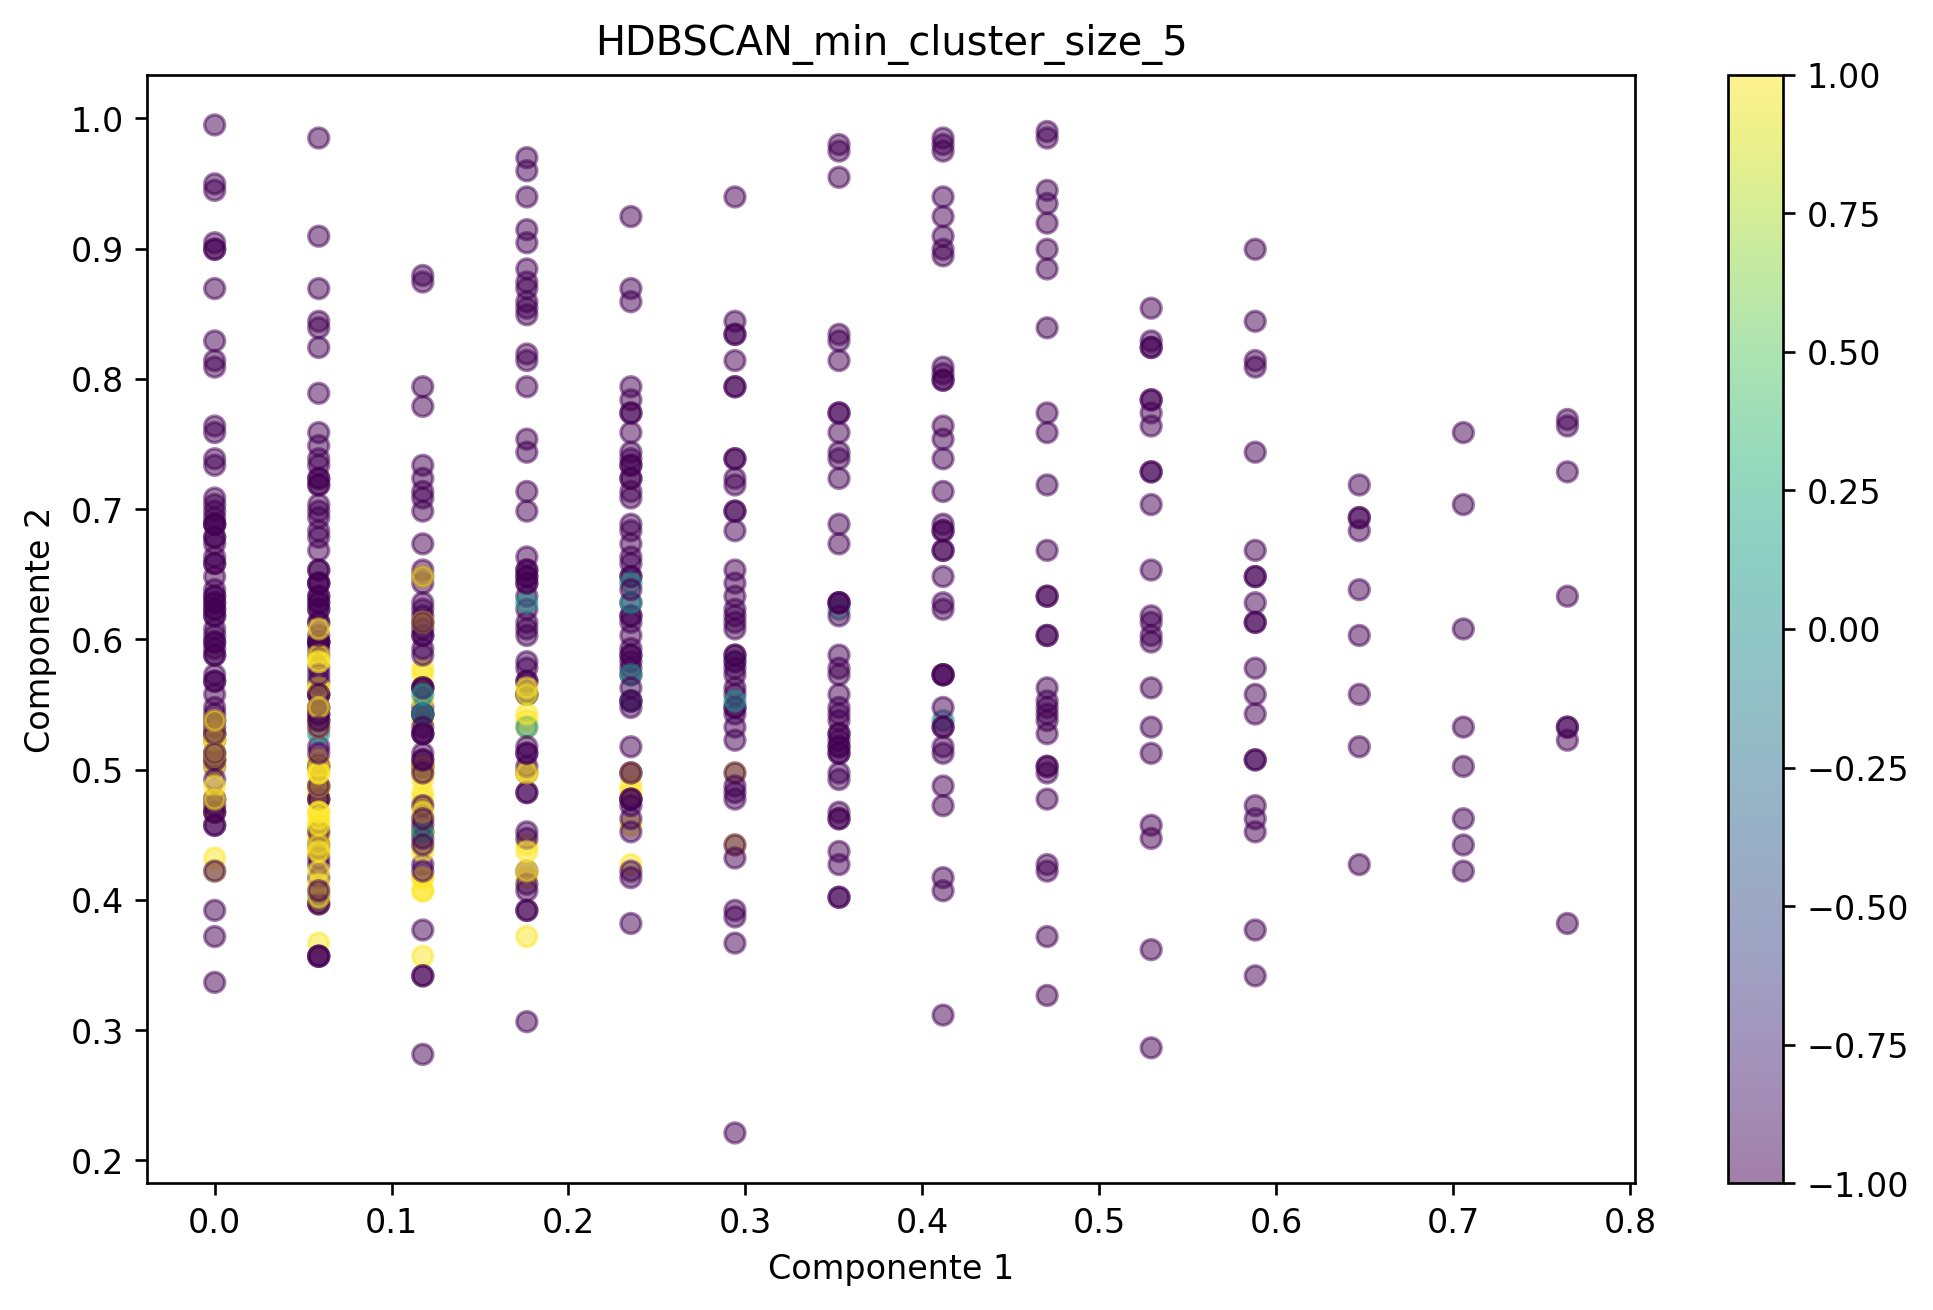

📊 Visualización guardada en outputs/viz_HDBSCAN_min_cluster_size_5.png
📌 Evaluando HDBSCAN con min_cluster_size=10
🔧 Ejecutando HDBSCAN (min_cluster_size=10)...


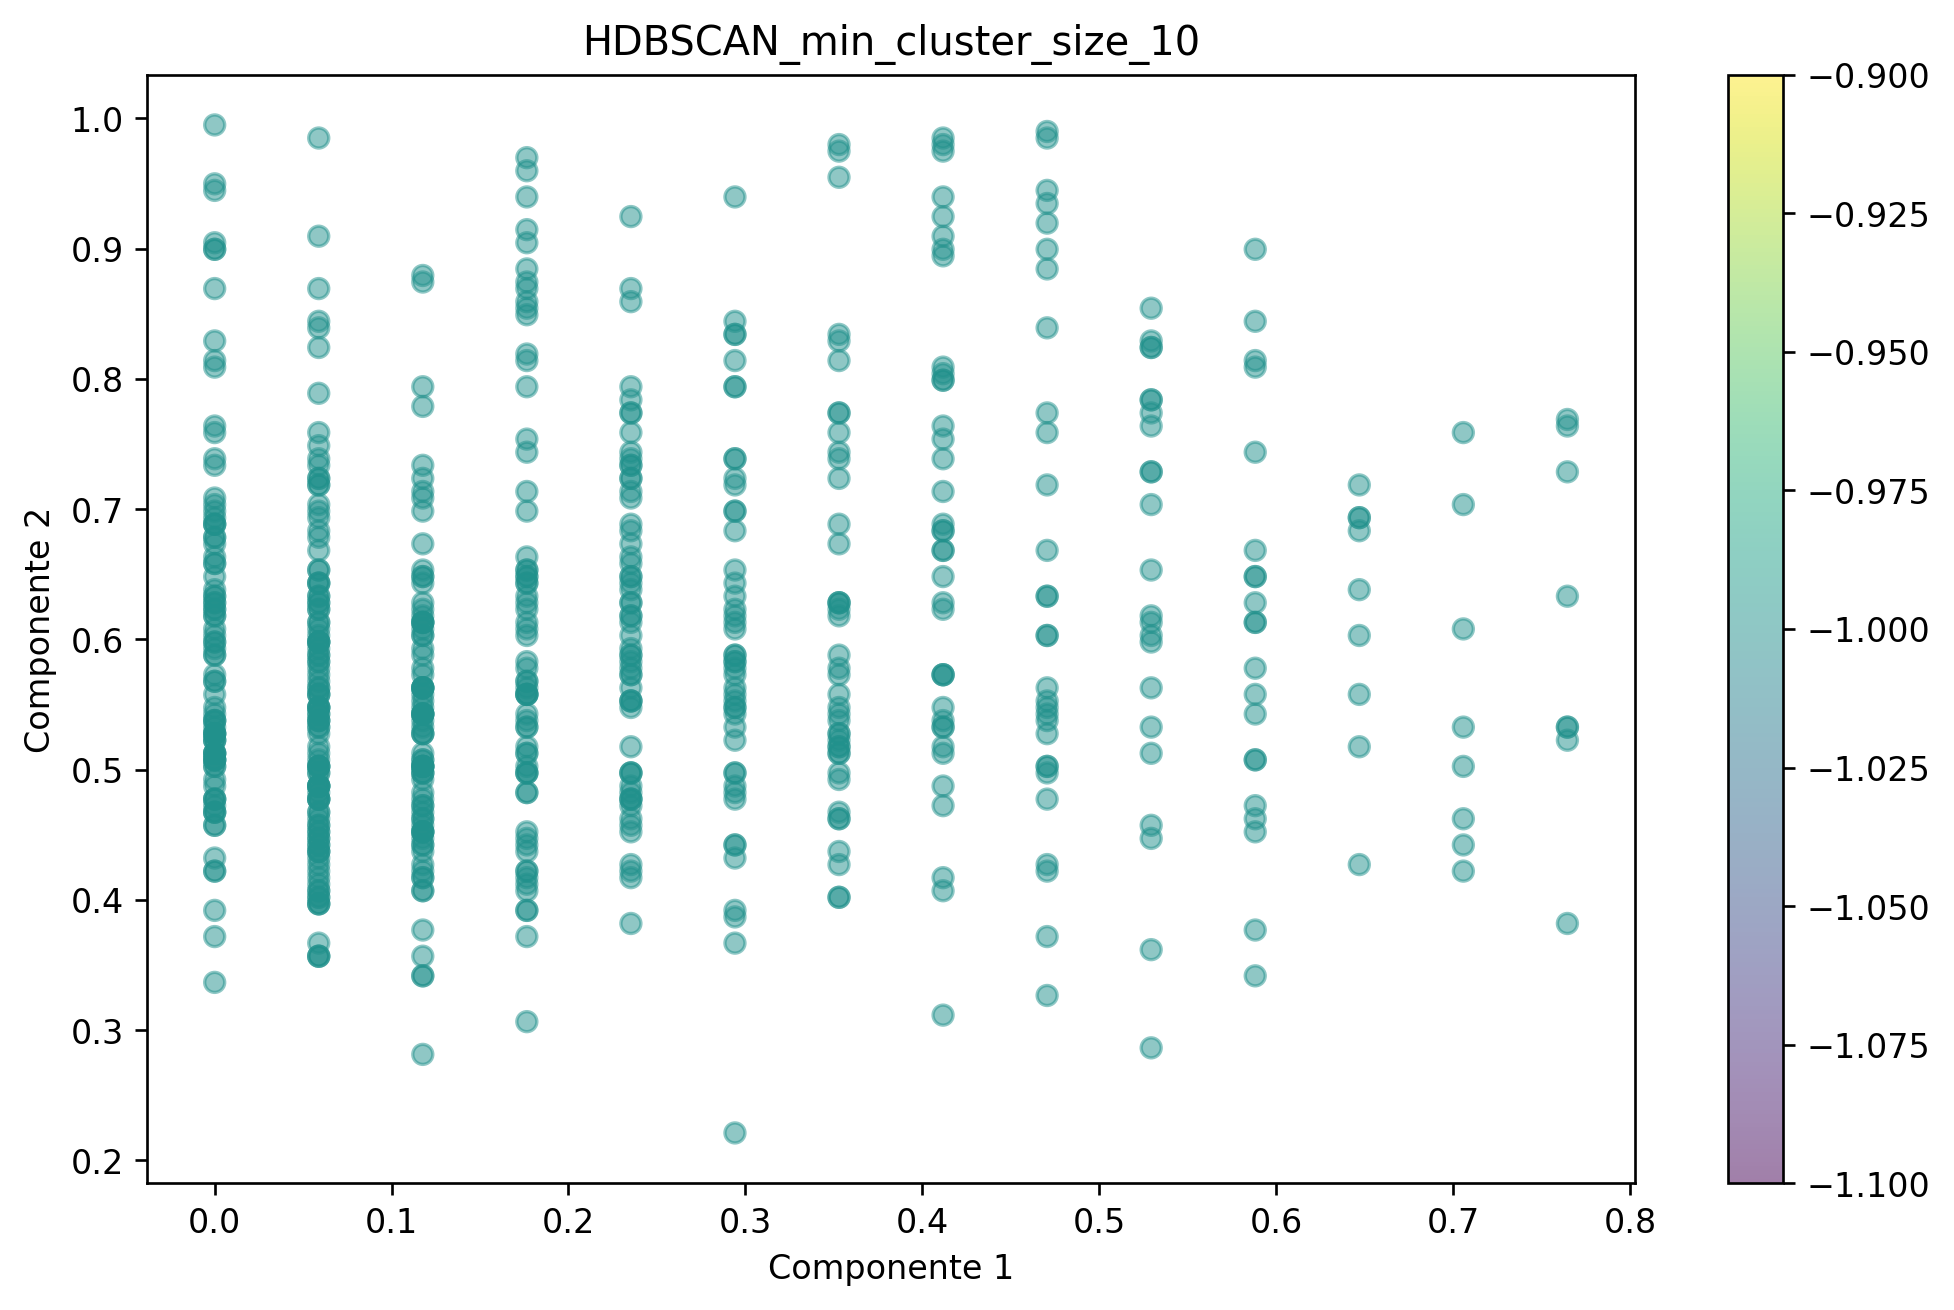

📊 Visualización guardada en outputs/viz_HDBSCAN_min_cluster_size_10.png
✅ Resultados HDBSCAN guardados en CSV consolidado


In [6]:
# === HDBSCAN ===
resultados_hdbscan = []
for min_cluster_size in [5, 10]:
    print(f"📌 Evaluando HDBSCAN con min_cluster_size={min_cluster_size}")
    etiquetas = aplicar_hdbscan(X_scaled, min_cluster_size=min_cluster_size)
    # Nota: nuestra función de visual guarda png en outputs/
    visualizar_clusters(X_scaled.values, etiquetas, f"HDBSCAN_min_cluster_size_{min_cluster_size}")
    resultados_hdbscan.append(
        evaluar_clusterings(X_scaled, etiquetas, "HDBSCAN", {"min_cluster_size": min_cluster_size})
    )
pd.DataFrame(resultados_hdbscan).to_csv(f"{output_dir}/HDBSCAN_consolidado.csv", index=False)
print("✅ Resultados HDBSCAN guardados en CSV consolidado")

In [7]:
# === Anomalías ===
anomalies_iso = detectar_anomalias_isolation_forest(X_scaled)
anomalies_svm = detectar_anomalias_one_class_svm(X_scaled)
df_out = X.copy()
df_out['Anomaly Isolation Forest'] = anomalies_iso
df_out['Anomaly One-Class SVM'] = anomalies_svm
print("Pacientes considerados anómalos por Isolation Forest:")
display(df_out[df_out['Anomaly Isolation Forest'] == -1].head(20))
print("Pacientes considerados anómalos por One-Class SVM:")
display(df_out[df_out['Anomaly One-Class SVM'] == -1].head(20))

Pacientes considerados anómalos por Isolation Forest:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
9       0.000000  0.592965       0.688525       0.474747  0.271868  0.682563   
14      0.411765  0.984925       0.737705       0.000000  0.000000  0.593145   
16      0.647059  0.718593       0.770492       0.333333  0.172577  0.545455   
20      0.764706  0.728643       0.672131       0.191919  0.130024  0.330849   
41      0.470588  0.884422       0.737705       0.343434  0.354610  0.502235   
43      0.411765  0.939698       0.557377       0.393939  0.359338  0.561848   
44      0.000000  0.502513       0.721311       0.606061  0.130024  0.697466   
52      0.117647  0.547739       0.754098       0.000000  0.000000  0.636364   
57      0.764706  0.633166       0.737705       0.000000  0.000000  0.646796   
67      0.764706  0.532663       0.590164       0.545455  0.000000  0.545455   
79      0.058824  0.613065       0.737705       0.515152  0.260047  0.740686   
103     0.000000  0.527638       0.688525       0.000000  0.000000  0.415797   
105     0.529412  0.613065       0.459016       0.000000  0.000000  0.496274   
123     0.529412  0.783920       0.704918       0.282828  0.183215  0.511177   
124     0.470588  0.944724       0.639344       0.000000  0.000000  0.713860   
125     0.411765  0.763819       0.721311       0.444444  0.000000  0.745156   
131     0.000000  0.572864       0.655738       0.343434  0.336879  0.658718   
162     0.235294  0.743719       0.491803       0.272727  0.375887  0.460507   
169     0.470588  0.984925       0.622951       0.292929  0.330969  0.558867   
170     0.294118  0.814070       0.852459       0.000000  0.000000  0.561848   

     DiabetesPedigreeFunction       Age  Anomaly Isolation Forest  \
9                    0.201964  0.166667                        -1   
14                   0.159266  0.333333                        -1   
16                   0.075149  0.500000                        -1   
20                   0.071307  0.600000                        -1   
41                   0.166097  0.616667                        -1   
43                   0.075149  0.333333                        -1   
44                   0.377455  0.166667                        -1   
52                   0.327498  0.550000                        -1   
57                   0.215628  0.350000                        -1   
67                   0.042699  0.400000                        -1   
79                   0.105465  0.166667                        -1   
103                  0.283091  0.683333                        -1   
105                  0.442357  0.200000                        -1   
123                  0.474381  0.350000                        -1   
124                  0.025192  0.366667                        -1   
125                  0.110589  0.250000                        -1   
131                  0.038002  0.100000                        -1   
162                  0.030743  0.133333                        -1   
169                  0.225021  0.600000                        -1   
170                  0.031170  0.516667                        -1   

     Anomaly One-Class SVM  
9                        1  
14                       1  
16                       1  
20                      -1  
41                      -1  
43                       1  
44                      -1  
52                       1  
57                      -1  
67                      -1  
79                      -1  
103                     -1  
105                      1  
123                      1  
124                      1  
125                      1  
131                      1  
162                      1  
169                     -1  
170                      1

Pacientes considerados anómalos por One-Class SVM:


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
20      0.764706  0.728643       0.672131       0.191919  0.130024  0.330849   
41      0.470588  0.884422       0.737705       0.343434  0.354610  0.502235   
42      0.058824  0.366834       0.409836       0.101010  0.000000  0.342772   
44      0.000000  0.502513       0.721311       0.606061  0.130024  0.697466   
57      0.764706  0.633166       0.737705       0.000000  0.000000  0.646796   
67      0.764706  0.532663       0.590164       0.545455  0.000000  0.545455   
70      0.058824  0.402010       0.450820       0.000000  0.000000  0.284650   
77      0.058824  0.356784       0.393443       0.181818  0.089835  0.304024   
79      0.058824  0.613065       0.737705       0.515152  0.260047  0.740686   
81      0.000000  0.628141       0.786885       0.000000  0.000000  0.335320   
103     0.000000  0.527638       0.688525       0.000000  0.000000  0.415797   
141     0.058824  0.396985       0.491803       0.424242  0.056738  0.648286   
159     0.058824  0.527638       0.475410       0.000000  0.000000  0.362146   
169     0.470588  0.984925       0.622951       0.292929  0.330969  0.558867   
174     0.000000  0.738693       0.696721       0.545455  0.000000  0.637854   
175     0.411765  0.899497       0.778689       0.313131  0.000000  0.509687   
178     0.705882  0.758794       0.573770       0.404040  0.320331  0.622951   
182     0.117647  0.793970       0.737705       0.000000  0.000000  0.470939   
195     0.000000  0.899497       0.737705       0.272727  0.000000  0.657228   
208     0.705882  0.462312       0.508197       0.070707  0.304965  0.411326   

     DiabetesPedigreeFunction       Age  Anomaly Isolation Forest  \
20                   0.071307  0.600000                        -1   
41                   0.166097  0.616667                        -1   
42                   0.072588  0.000000                         1   
44                   0.377455  0.166667                        -1   
57                   0.215628  0.350000                        -1   
67                   0.042699  0.400000                        -1   
70                   0.076857  0.000000                         1   
77                   0.104611  0.016667                         1   
79                   0.105465  0.166667                        -1   
81                   0.078565  0.000000                         1   
103                  0.283091  0.683333                        -1   
141                  0.256191  0.033333                         1   
159                  0.046541  0.000000                         1   
169                  0.225021  0.600000                        -1   
174                  0.126815  0.050000                        -1   
175                  0.036721  0.650000                        -1   
178                  0.283518  0.283333                        -1   
182                  0.310418  0.750000                        -1   
195                  0.259607  0.033333                         1   
208                  0.362084  0.383333                        -1   

     Anomaly One-Class SVM  
20                      -1  
41                      -1  
42                      -1  
44                      -1  
57                      -1  
67                      -1  
70                      -1  
77                      -1  
79                      -1  
81                      -1  
103                     -1  
141                     -1  
159                     -1  
169                     -1  
174                     -1  
175                     -1  
178                     -1  
182                     -1  
195                     -1  
208                     -1

✅ Los gráficos se guardan en `outputs/` (por ejemplo:  
`viz_PCA_2D_-_Clustering_Basado_en_Densidad.png`,  
`viz_DBSCAN_eps_0.5__min_samples_10.png`,  
`viz_HDBSCAN_min_cluster_size_5.png`,  
`UMAP_Visualization.png`, etc.)